#############



1.实现singSound的描述性统计    
2.手动尝试多种变换



#############

In [1]:
%matplotlib inline
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
# pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
pd.set_option('display.max_columns', None) #输出所有列

def set_ch():
    from pylab import mpl
    #中文字体问题已经解决，记录在evernote中
    #mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
set_ch()
from datetime import datetime,timedelta
import matplotlib
matplotlib.style.use('ggplot')
import sys
import json

In [119]:
df_CS = pd.read_csv('data/CS_engine_result.csv').drop(['Unnamed: 0'],axis=1)
df_singSound = pd.read_csv('data/singSound_result&human.csv').drop(['Unnamed: 0'], axis=1)

In [29]:
len(df_CS[[isnan(df_CS.scores[i]) for i in range(len(df_CS))]])

945

In [87]:
print 'scores: %s' % eval('len(df_CS[[isnan(df_CS.' + 'scores' + '[i]) for i in range(len(df_CS))]])')
print 'ppScores: %s' % eval('len(df_CS[[isnan(df_CS.' + 'ppScores' + '[i]) for i in range(len(df_CS))]])')
print 'AAModel: %s' % (len(df_CS) - int(df_CS.AAModel.value_counts().sum()))
print 'targetText: %s' % (len(df_CS) - int(df_CS.targetText.value_counts().sum()))
print 'markedText: %s' % (len(df_CS) - int(df_CS.markedText.value_counts().sum()))
print 'nRef: %s' % eval('len(df_CS[[isnan(df_CS.' + 'nRef' + '[i]) for i in range(len(df_CS))]])')
print 'nHyp: %s' % eval('len(df_CS[[isnan(df_CS.' + 'nHyp' + '[i]) for i in range(len(df_CS))]])')
print 'nCorr: %s' % eval('len(df_CS[[isnan(df_CS.' + 'nCorr' + '[i]) for i in range(len(df_CS))]])')
print 'nErr: %s' % eval('len(df_CS[[isnan(df_CS.' + 'nErr' + '[i]) for i in range(len(df_CS))]])')
print 'nSub: %s' % eval('len(df_CS[[isnan(df_CS.' + 'nSub' + '[i]) for i in range(len(df_CS))]])')
print 'nDel: %s' % eval('len(df_CS[[isnan(df_CS.' + 'nDel' + '[i]) for i in range(len(df_CS))]])')
print 'nIns: %s' % eval('len(df_CS[[isnan(df_CS.' + 'nIns' + '[i]) for i in range(len(df_CS))]])')
print 'wordScores: %s' % (len(df_CS) - int(df_CS.wordScores.value_counts().sum()))
print 'wordStatus: %s' % (len(df_CS) - int(df_CS.wordStatus.value_counts().sum()))
print 'AQstatus: %s' % (len(df_CS) - int(df_CS.AQstatus.value_counts().sum()))
print 'AQvol: %s' % eval('len(df_CS[[isnan(df_CS.' + 'AQvol' + '[i]) for i in range(len(df_CS))]])')
print 'AQnoisy: %s' % eval('len(df_CS[[isnan(df_CS.' + 'AQnoisy' + '[i]) for i in range(len(df_CS))]])')
print 'AQbgpow: %s' % eval('len(df_CS[[isnan(df_CS.' + 'AQnoisy' + '[i]) for i in range(len(df_CS))]])')

scores: 945
ppScores: 1541
AAModel: 945
targetText: 945
markedText: 945
nRef: 945
nHyp: 945
nCorr: 945
nErr: 945
nSub: 945
nDel: 945
nIns: 945
wordScores: 944
wordStatus: 944
AQstatus: 945
AQvol: 945
AQnoisy: 11505
AQbgpow: 11505


CS打分结果中，各个字段均包含NA值，除去没有返回结果的945条记录外，['ppScores','AQnoisy','AQbgpow']这3个字段有空值，即不是每条记录都给出这3个方面的评价

In [120]:
from math import isnan
df_CS_scores = df_CS.drop(df_CS[[isnan(df_CS.scores[i]) for i in range(len(df_CS))]].index)
df_CS_ppScores = df_CS.drop(df_CS[[isnan(df_CS.ppScores[i]) for i in range(len(df_CS))]].index)
df_singSound = df_singSound.drop(df_singSound[[isnan(df_singSound.result_overall[i]) for i in range(len(df_singSound))]].index)

In [161]:
df_CS_scores.drop(df_CS_ppScores.index).ppScores.fillna(0)

44       0.0
45       0.0
46       0.0
48       0.0
49       0.0
64       0.0
65       0.0
66       0.0
143      0.0
166      0.0
190      0.0
191      0.0
217      0.0
222      0.0
227      0.0
261      0.0
360      0.0
363      0.0
365      0.0
408      0.0
425      0.0
426      0.0
427      0.0
428      0.0
429      0.0
509      0.0
510      0.0
567      0.0
615      0.0
616      0.0
        ... 
13103    0.0
13134    0.0
13136    0.0
13137    0.0
13140    0.0
13164    0.0
13169    0.0
13170    0.0
13201    0.0
13208    0.0
13225    0.0
13243    0.0
13280    0.0
13281    0.0
13282    0.0
13283    0.0
13284    0.0
13289    0.0
13290    0.0
13291    0.0
13292    0.0
13293    0.0
13317    0.0
13373    0.0
13374    0.0
13423    0.0
13430    0.0
13491    0.0
13504    0.0
13505    0.0
Name: ppScores, Length: 596, dtype: float64

In [159]:
df_CS_ppScores.ppScores

30       0.649
31       0.616
32       0.656
33       0.547
34       0.584
35       0.514
36       0.669
37       0.591
38       0.448
41       0.525
47       0.197
50       0.449
51       0.594
52       0.563
53       0.561
54       0.538
55       0.684
56       0.339
57       0.344
58       0.450
59       0.601
60       0.342
61       0.450
62       0.518
63       0.501
67       0.416
68       0.472
69       0.574
70       0.280
71       0.512
         ...  
13476    0.450
13477    0.365
13478    0.782
13479    0.445
13480    0.457
13481    0.435
13482    0.493
13483    0.637
13484    0.551
13485    0.207
13486    0.564
13487    0.580
13488    0.533
13489    0.732
13490    0.825
13492    0.397
13493    0.527
13494    0.518
13495    0.592
13496    0.475
13497    0.614
13498    0.814
13499    0.615
13500    0.450
13501    0.252
13502    0.134
13503    0.518
13506    0.723
13507    0.625
13508    0.106
Name: ppScores, Length: 11949, dtype: float64

In [169]:
# 替换ppScores中的NA值为0
df_CS_scores['ppScores'] = pd.concat([df_CS_scores.drop(df_CS_ppScores.index).ppScores.fillna(0), df_CS_ppScores.ppScores]).sort_index().values

有596条记录ppScore为NA，而这些记录在scores上面的得分为0，因此将ppScores中值为NA的替换为0

接下来对CS的分析以df_CS_scores进行

# 总分分布

In [102]:
import seaborn as sns

In [192]:
df_CS = df_CS_scores

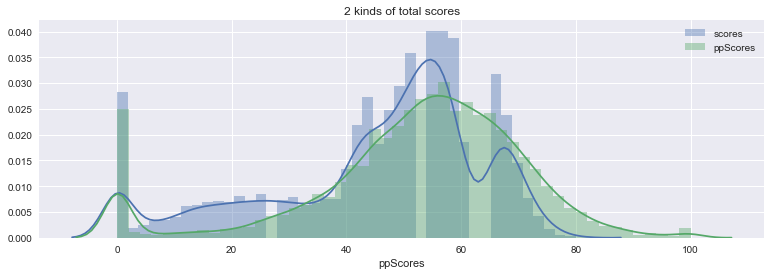

In [193]:
plt.rc('figure', figsize=(13, 4))
sns.distplot(df_CS.scores * 20,label='scores')
sns.distplot(df_CS.ppScores * 100,label='ppScores')
plt.title('2 kinds of total scores')
plt.legend()

Text(0.5,1,u'ratio of 0scores record')

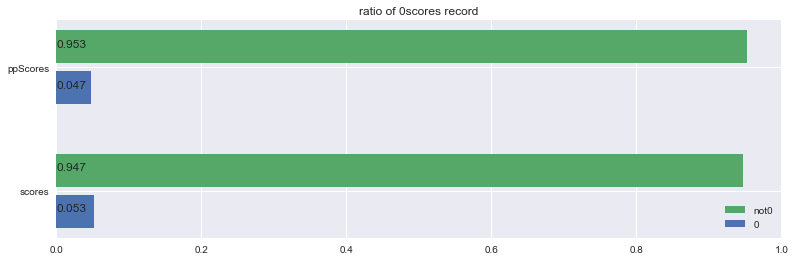

In [246]:
# scores 0分和非0分占比
scores_0_ratio =  [(df_CS.scores.value_counts()[0])/len(df_CS),(df_CS.scores.value_counts().sum()-df_CS.scores.value_counts()[0])/len(df_CS)]

# ppScores 0分和非0分占比
ppScores_0_ratio =  [(df_CS.ppScores.value_counts()[0])/len(df_CS),(df_CS.ppScores.value_counts().sum()-df_CS.ppScores.value_counts()[0])/len(df_CS)]

plt.barh(1,0.947,color = current_palette[1], label='not0')
plt.barh(0,0.052,color = current_palette[0], label='0')
plt.barh(4,0.953,color = current_palette[1], label='not0')
plt.barh(3,0.047,color = current_palette[0], label='0')
plt.yticks((0.5,3.5),('scores','ppScores'))
plt.annotate(round(scores_0_ratio[0],3),xy=[0,0])
plt.annotate(round(scores_0_ratio[1],3),xy=[0,1])
plt.annotate(round(ppScores_0_ratio[0],3),xy=[0,3])
plt.annotate(round(ppScores_0_ratio[1],3),xy=[0,4])
plt.legend()
plt.title('ratio of 0scores records')


In [254]:
print [df_CS.scores.mean()*20,
 df_CS.scores.median()*20,
 df_CS.scores.mode()*20,
 df_CS.scores.min()*20,
 df_CS.scores.max()*20,
 df_CS.scores.std()*20]

print [df_CS.ppScores.mean()*100,
 df_CS.ppScores.median()*100,
 df_CS.ppScores.mode()*100,
 df_CS.ppScores.min()*100,
 df_CS.ppScores.max()*100,
 df_CS.ppScores.std()*100]

print[df_CS[df_CS.scores !=0].scores.mean()*20,
      df_CS[df_CS.scores !=0].scores.median()*20,
      df_CS[df_CS.scores !=0].scores.mode()*20,
      df_CS[df_CS.scores !=0].scores.min()*20,
      df_CS[df_CS.scores !=0].scores.max()*20,
      df_CS[df_CS.scores !=0].scores.std()*20
]

print[df_CS[df_CS.scores !=0].ppScores.mean()*100,
      df_CS[df_CS.scores !=0].ppScores.median()*100,
      df_CS[df_CS.scores !=0].ppScores.mode()*100,
      df_CS[df_CS.scores !=0].ppScores.min()*100,
      df_CS[df_CS.scores !=0].ppScores.max()*100,
      df_CS[df_CS.scores !=0].ppScores.std()*100
]

[45.140151213688696, 50.0, 0    56.0
dtype: float64, 0.0, 80.0, 19.045610801653744]
[52.65298846000771, 55.2, 0    0.0
dtype: float64, 0.0, 100.0, 18.94902224782645]
[47.65467988573335, 52.0, 0    56.0
dtype: float64, 2.0, 80.0, 16.2204809592244]
[55.568677533187426, 56.2, 0    45.0
dtype: float64, 1.7000000000000002, 100.0, 14.756118115737198]


# 细节

In [264]:
# 正确率、错误率
corr_ratio = df_CS.nCorr / (df_CS.nCorr.values + df_CS.nErr.values)
err_ratio = df_CS.nErr / (df_CS.nCorr.values + df_CS.nErr.values)
# 替换率、删除率、插入率
sub_ratio = df_CS.nSub / (df_CS.nCorr.values + df_CS.nErr.values)
del_ratio = df_CS.nDel / (df_CS.nCorr.values + df_CS.nErr.values)
ins_ratio = df_CS.nIns / (df_CS.nCorr.values + df_CS.nErr.values)


In [275]:
df_CS['corr_ratio'] = corr_ratio
df_CS['err_ratio'] = err_ratio
df_CS['sub_ratio'] = sub_ratio
df_CS['del_ratio'] = del_ratio
df_CS['ins_ratio'] = ins_ratio

Text(0,1,u'4.8%')

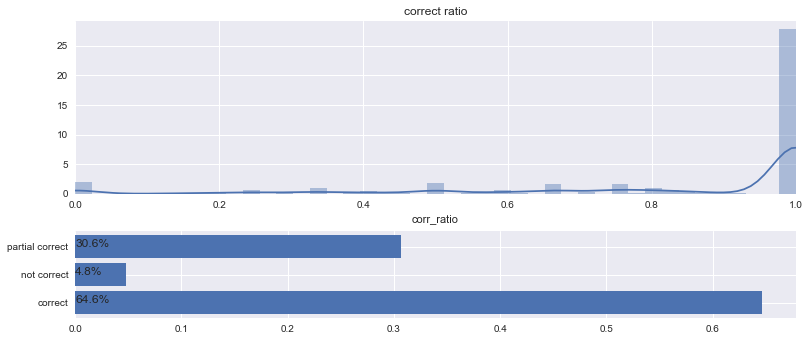

In [706]:
import seaborn as sns
plt.rc('figure', figsize=(13, 4))

rect1 = [0.14, 0.35, 0.77, 0.6] # [左, 下, 宽, 高] 规定的矩形区域 （全部是0~1之间的数，表示比例）
rect2 = [0.14, -0.08, 0.77, 0.3]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)

sns.distplot(df_CS.corr_ratio,ax=ax1)
ax1.set_title('correct ratio')
ax1.set_xlim(0,1)

ax2.barh(['correct','partial correct','not correct'],
         [len(df_CS[df_CS.corr_ratio == 1]) / len(df_CS), 
          len(df_CS[(df_CS.corr_ratio != 1) & (df_CS.corr_ratio != 0)]) / len(df_CS),
          len(df_CS[df_CS.corr_ratio == 0]) / len(df_CS)])
ax2.annotate('64.6%',xy=[0,0])
ax2.annotate('30.6%',xy=[0,2])
ax2.annotate('4.8%',xy=[0,1])
#ax2.set_title('Proportion of 0grade & not0grade')

(0, 1)

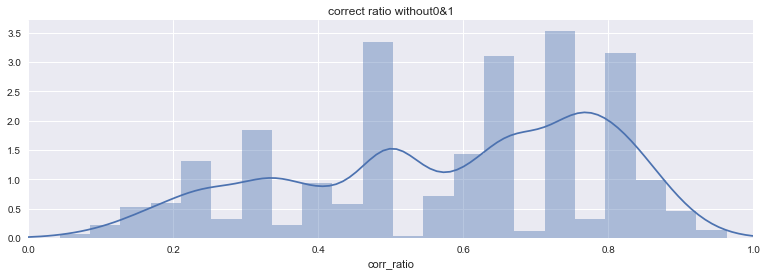

In [382]:
sns.distplot(df_CS[(df_CS.corr_ratio != 1) & (df_CS.corr_ratio != 0)].corr_ratio)
plt.title('correct ratio without0&1')
plt.xlim(0,1)

In [337]:
df_CS = df_CS.reset_index().drop('index',axis=1)

In [384]:
len(df_CS[df_CS.corr_ratio >= 0.5]) / len(df_CS)

0.8676482292081178

In [346]:
# 单词平均发音得分
word_avg_li = []
for i in range(len(df_CS)):
    word_sum = 0
    value_li = eval(df_CS.wordScores[i])
    for val in value_li:
        word_sum = word_sum + float(val)
    try:
        word_avg_li.append(word_sum/len(value_li))
    except:
        word_avg_li.append(0)

In [349]:
df_CS['word_avgScore'] = word_avg_li

Text(0,1,u'95.3%')

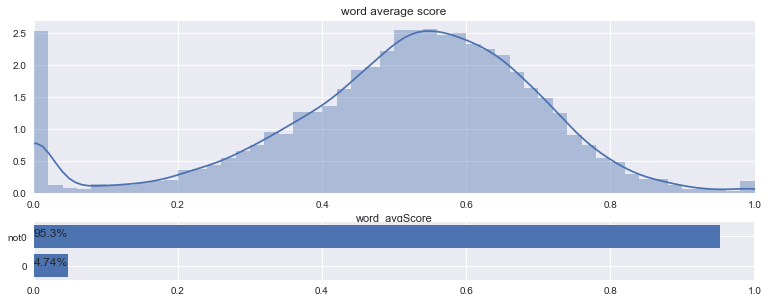

In [704]:
import seaborn as sns
plt.rc('figure', figsize=(13, 4))

rect1 = [0.14, 0.35, 0.77, 0.6] # [左, 下, 宽, 高] 规定的矩形区域 （全部是0~1之间的数，表示比例）
rect2 = [0.14, 0.05, 0.77, 0.2]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)

sns.distplot(df_CS.word_avgScore,ax=ax1)
ax1.set_title('word average score')
ax1.set_xlim(0,1)

ax2.barh(['0','not0'],[len(df_CS[df_CS.word_avgScore == 0]) / len(df_CS), len(df_CS[df_CS.word_avgScore != 0]) / len(df_CS)])
ax2.annotate('4.74%',xy=[0,0])
ax2.annotate('95.3%',xy=[0,1])
#ax2.set_title('Proportion of 0grade & not0grade')


In [394]:
[len(df_CS[df_CS.sub_ratio > 0]) / len(df_CS[df_CS.err_ratio > 0]),
len(df_CS[df_CS.del_ratio > 0]) / len(df_CS[df_CS.err_ratio > 0]),
len(df_CS[df_CS.ins_ratio > 0]) / len(df_CS[df_CS.err_ratio > 0])]

[0.4192895683453237, 0.5883543165467626, 0.28035071942446044]

In [400]:
df_err = DataFrame()
df_err['ratio'] = [len(df_CS[df_CS.sub_ratio > 0]) / len(df_CS[df_CS.err_ratio > 0]),
len(df_CS[df_CS.del_ratio > 0]) / len(df_CS[df_CS.err_ratio > 0]),
len(df_CS[df_CS.ins_ratio > 0]) / len(df_CS[df_CS.err_ratio > 0])]

In [401]:
df_err.index = ['sub','del','ins']

Text(0.5,1,u'ratio of error type')

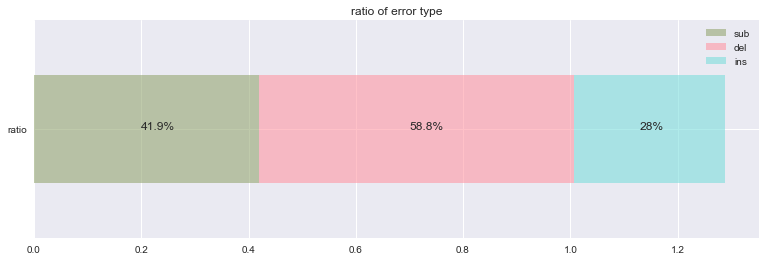

In [430]:
df_err.T.plot(kind='barh',stacked=True,color=["#95A773","#FF98A4","#7CDEDC"],alpha=0.6)
plt.annotate("41.9%",[0.2,0])
plt.annotate("58.8%",[0.7,0])
plt.annotate("28%",[1.13,0])
plt.title('ratio of error type')

In [421]:
# 同时出现3种错误 占比
three_err = len(df_CS[(df_CS.sub_ratio>0) & (df_CS.del_ratio>0) & (df_CS.ins_ratio>0)]) / len(df_CS[df_CS.err_ratio>0])

# 仅出现1种错误 占比
one_err = (len(df_CS[(df_CS.sub_ratio>0) & (df_CS.del_ratio == 0) & (df_CS.ins_ratio == 0)]) 
+ len(df_CS[(df_CS.sub_ratio==0) & (df_CS.del_ratio > 0) & (df_CS.ins_ratio == 0)]) 
+ len(df_CS[(df_CS.sub_ratio==0) & (df_CS.del_ratio == 0) & (df_CS.ins_ratio > 0)])) / len(df_CS[df_CS.err_ratio > 0])

# 同时出现2种错误 占比
two_err = (len(df_CS[(df_CS.sub_ratio>0) & (df_CS.del_ratio > 0) & (df_CS.ins_ratio == 0)]) 
+ len(df_CS[(df_CS.sub_ratio>0) & (df_CS.del_ratio == 0) & (df_CS.ins_ratio > 0)]) 
+ len(df_CS[(df_CS.sub_ratio==0) & (df_CS.del_ratio > 0) & (df_CS.ins_ratio > 0)])) / len(df_CS[df_CS.err_ratio > 0])

In [424]:
err_type_li = []
err_type_li.append(one_err)
err_type_li.append(two_err)
err_type_li.append(three_err)

df_err2 = DataFrame()
df_err2['raito'] = err_type_li
df_err2.index = ['one error','two error','three error']

In [427]:
df_err2

,raito
one error,0.723471
two error,0.265063
three error,0.011466


Text(1,0,u'1.2%')

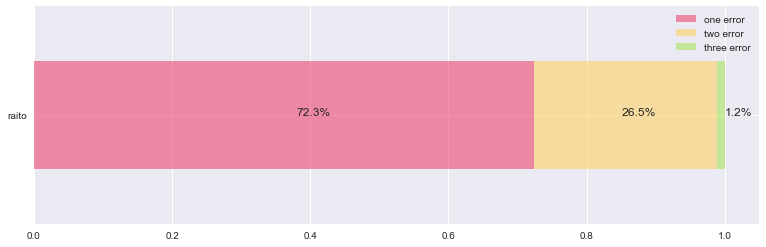

In [434]:
df_err2.T.plot(kind='barh',stacked=True,color=["#EF476F","#FFD166","#ADE25D"],alpha=0.6)
plt.annotate("72.3%",[0.38,0])
plt.annotate("26.5%",[0.85,0])
plt.annotate("1.2%",[1,0])

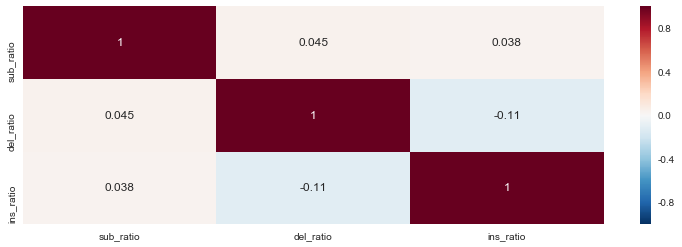

In [417]:
from scipy.stats.stats import pearsonr
features = ['sub_ratio','del_ratio','ins_ratio']
corr_li = []
for fea1 in features:
    middle_li = []
    for fea2 in features:
        middle_li.append(pearsonr(eval('df_CS.' + fea1 + '.values'), eval('df_CS.' + fea2 + '.values'))[0])
    corr_li.append(middle_li)
    
df_corr = DataFrame(corr_li)
df_corr.index = features
df_corr.columns = features

sns.heatmap(df_corr,annot=True)

替换率，删除率和插入率之间相关关系不大

# 提示信息

In [440]:
df_status = df_CS.AQstatus.value_counts()

In [443]:
df_status.index = ['normal','truncated','too loud','too loud & truncated', 'too noisy', 'too loud & noisy']

In [711]:
df_status.values / len(df_CS)

array([ 0.6012,  0.2023,  0.091 ,  0.0611,  0.0369,  0.0074])

Text(0.5,1,u'tip information')

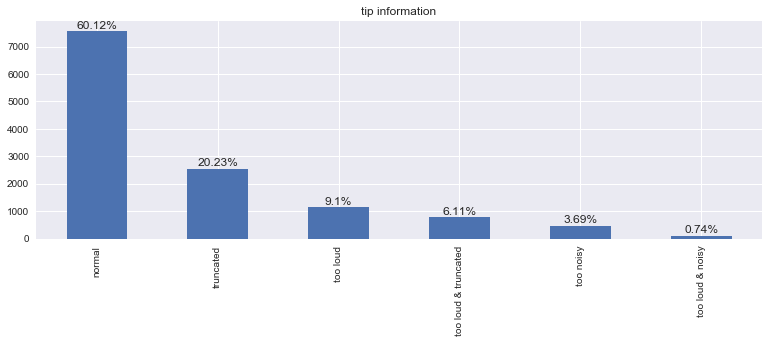

In [712]:
df_status.plot('bar')
tip_li = ['60.12%','20.23%','9.1%','6.11%','3.69%','0.74%']
for i in range(len(df_status)):
    plt.annotate(tip_li[i],xy=[i, df_status[i]+100], horizontalalignment = 'center')
plt.title('tip information')

* 0: normal      
* 2: too noisy       
* 8: truncated     
* 10: too loud        
* 12: too loud / too noisy       
* 18: too loud / truncated      

In [481]:
[df_status[0].sum() / df_status[0:].sum(), df_status[1:].sum() / df_status[0:].sum()]

df_tip = DataFrame()
df_tip['raito'] = [df_status[1:].sum() / df_status[0:].sum(), df_status[0].sum() / df_status[0:].sum()]
df_tip.index = ['abnormal','normal']

In [482]:
df_tip

,raito
abnormal,0.398806
normal,0.601194


In [475]:
df_status.index[1:]

Index([u'truncated', u'too loud', u'too loud & truncated', u'too noisy',
       u'too loud & noisy'],
      dtype='object')

In [484]:
[df_status[1].sum() / df_status[0:].sum(), 
 df_status[2].sum() / df_status[0:].sum(),
 df_status[3].sum() / df_status[0:].sum(),
 df_status[4].sum() / df_status[0:].sum(),
 df_status[5].sum() / df_status[0:].sum()
]

df_tip2 = DataFrame()
df_tip2['raito'] = [df_status[1].sum() / df_status[0:].sum(), 
 df_status[2].sum() / df_status[0:].sum(),
 df_status[3].sum() / df_status[0:].sum(),
 df_status[4].sum() / df_status[0:].sum(),
 df_status[5].sum() / df_status[0:].sum()
]

df_tip2.index = df_status.index[1:]

In [485]:
df_tip2

,raito
truncated,0.202308
too loud,0.091047
too loud & truncated,0.061122
too noisy,0.036928
too loud & noisy,0.007402


Text(0.4,0,u'0.8%')

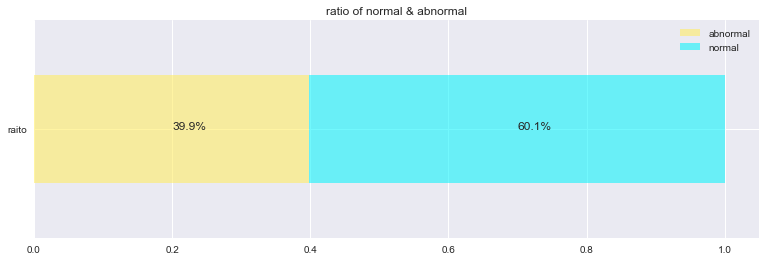

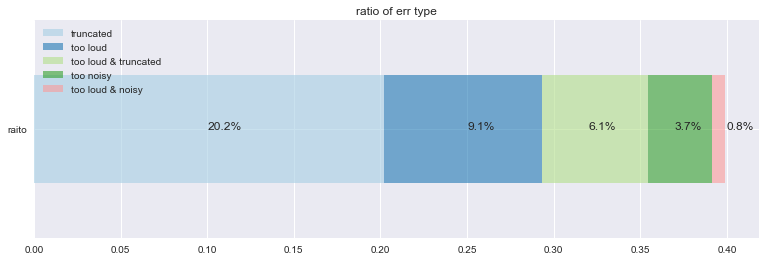

In [563]:
df_tip.T.plot(kind='barh',stacked=True,color=["#FFED66","#14F4FC"],alpha=0.6)
plt.annotate("39.9%",[0.2,0])
plt.annotate("60.1%",[0.7,0])
plt.title('ratio of normal & abnormal')

df_tip2.T.plot(kind='barh',stacked=True,color=sns.color_palette("Paired"), alpha=0.6)
plt.title('ratio of err type')
plt.annotate('20.2%',[0.1,0])
plt.annotate('9.1%',[0.25,0])
plt.annotate('6.1%',[0.32,0])
plt.annotate('3.7%',[0.37,0])
plt.annotate('0.8%',[0.4,0])

* 0: normal
* 2: too noisy
* 8: truncated
* 10: too loud
* 12: too loud / too noisy
* 18: too loud / truncated

In [497]:
df_tip2

,raito
truncated,0.202308
too loud,0.091047
too loud & truncated,0.061122
too noisy,0.036928
too loud & noisy,0.007402


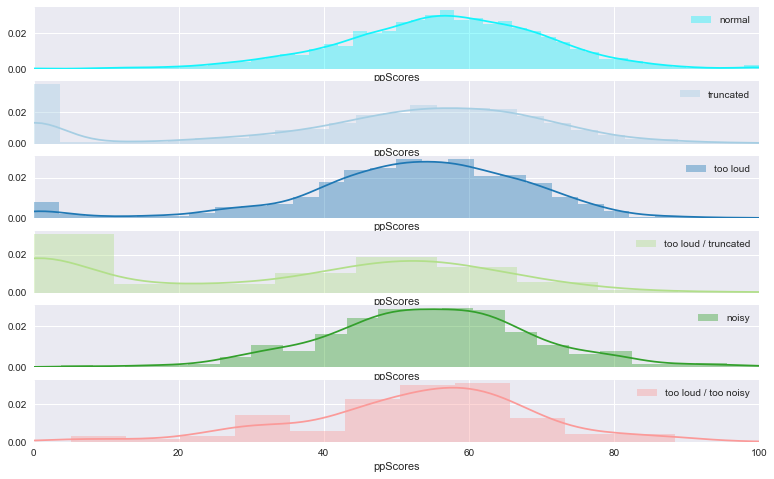

In [645]:
## 不同提示信息下总分分布
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(13, 8), sharex=True)
plt.xlim(0,100)

sns.distplot(df_CS[df_CS.AQstatus == 0].ppScores*100, ax=ax1, color="#14F4FC",label='normal')
sns.distplot(df_CS[df_CS.AQstatus == 8].ppScores*100, ax=ax2, color=sns.color_palette("Paired")[0],label='truncated')
sns.distplot(df_CS[df_CS.AQstatus == 10].ppScores*100, ax=ax3, color=sns.color_palette("Paired")[1],label='too loud')
sns.distplot(df_CS[df_CS.AQstatus == 18].ppScores*100, ax=ax4, color=sns.color_palette("Paired")[2],label='too loud / truncated')
sns.distplot(df_CS[df_CS.AQstatus == 2].ppScores*100, ax=ax5, color=sns.color_palette("Paired")[3],label='noisy')
sns.distplot(df_CS[df_CS.AQstatus == 12].ppScores*100, ax=ax6, color=sns.color_palette("Paired")[4],label='too loud / too noisy')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')
ax5.legend(loc='best')
ax6.legend(loc='best')

# 音量

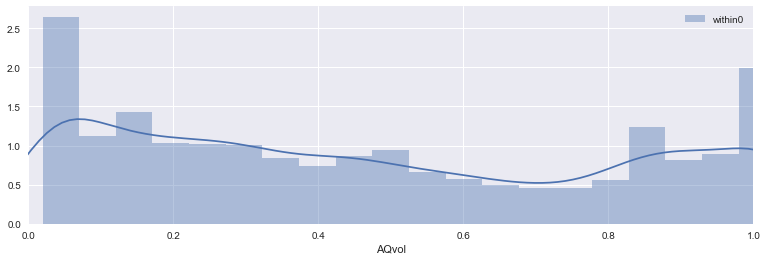

In [564]:
sns.distplot(df_CS.AQvol,bins=20,label='within0')
plt.xlim(0,1)
plt.legend()

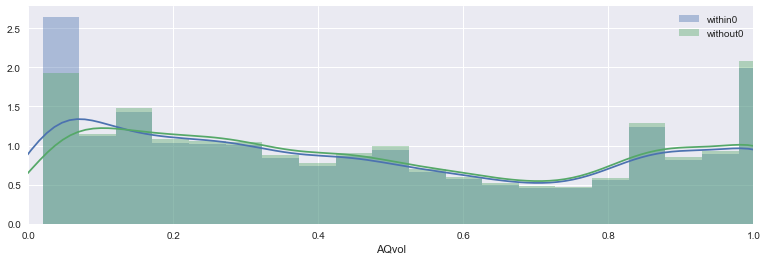

In [538]:
sns.distplot(df_CS.AQvol,bins=20,label='within0')
sns.distplot(df_CS[df_CS.ppScores != 0].AQvol, bins=20,label='without0')
plt.xlim(0,1)
plt.legend()

(0, 1)

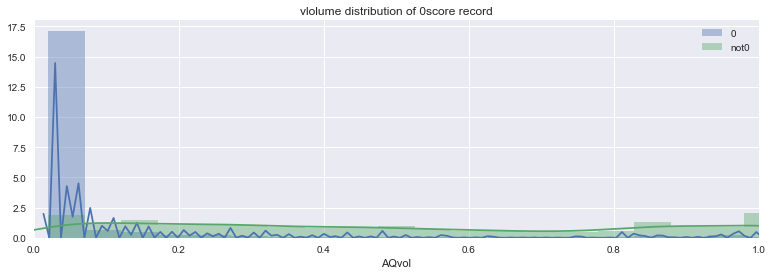

In [567]:
sns.distplot(df_CS[df_CS.ppScores == 0].AQvol, bins=20,label='0')
sns.distplot(df_CS[df_CS.ppScores != 0].AQvol, bins=20,label='not0')
plt.legend()
plt.title('vlolume distribution of 0score record')
plt.xlim(0,1)

# 噪音

两个显示noisy的字段，AQnoisy和AQbgpow相同，AQnoisy中有更多的NA，因此选择AQbgpow进行统计

Text(0.5,1,u'Distribution of noisy')

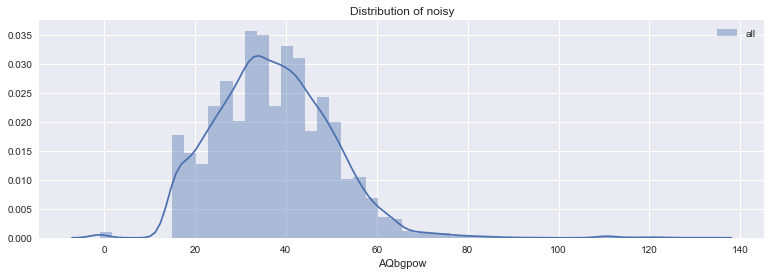

In [561]:
sns.distplot(df_CS.AQbgpow, label='all')
plt.legend()
plt.title('Distribution of noisy')

Text(0.5,1,u'Distribution of noisy')

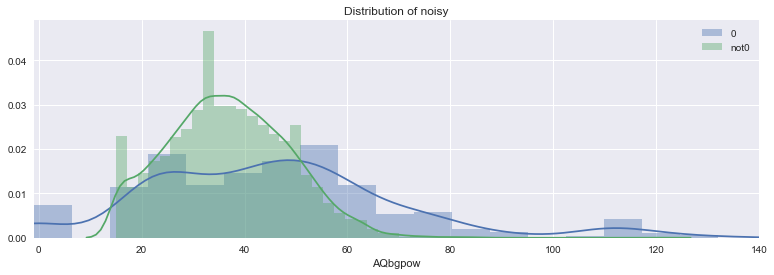

In [569]:
sns.distplot(df_CS[df_CS.ppScores ==0].AQbgpow, label='0')
sns.distplot(df_CS[df_CS.ppScores !=0].AQbgpow, label='not0')
plt.xlim(-1,140)
plt.legend()
plt.title('Distribution of noisy')

In [526]:
[df_CS.AQbgpow.min(), df_CS.AQbgpow.max()]

[-1.0, 132.0]

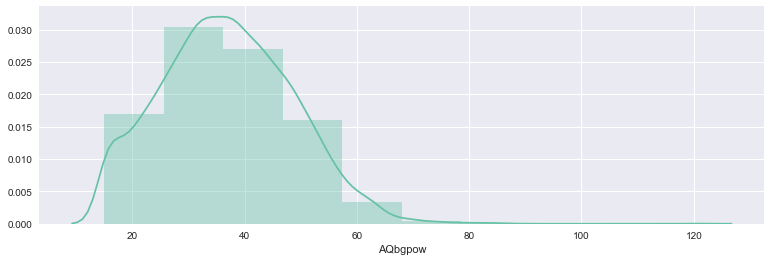

In [552]:
sns.distplot(df_CS[df_CS.ppScores !=0].AQbgpow, label='not0',color=sns.color_palette("Set2", 10)[0],bins=10)

In [542]:
(len(df_CS[df_CS.AQbgpow <10]) / len(df_CS),
len(df_CS[df_CS.ppScores == 0][df_CS.AQbgpow < 10]) / len(df_CS[df_CS.ppScores == 0]))

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


(0.002626343016315161, 0.05536912751677853)

In [544]:
(len(df_CS[df_CS.AQbgpow <10]),
 len(df_CS[df_CS.ppScores != 0][df_CS.AQbgpow < 10]),
len(df_CS[df_CS.ppScores == 0][df_CS.AQbgpow < 10]))

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


(33, 0, 33)

In [576]:
df_aamodel = DataFrame()
df_aamodel['ratio'] = [len(df_CS[df_CS.AAModel == 'Child']) / len(df_CS),
len(df_CS[df_CS.AAModel == 'Adult']) / len(df_CS)]
df_aamodel.index = ['Child','Adult']

Text(0.8,0,u'39.9%')

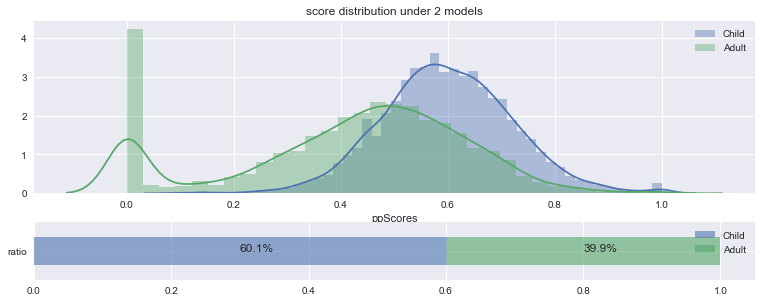

In [581]:
rect1 = [0.14, 0.35, 0.77, 0.6] # [左, 下, 宽, 高] 规定的矩形区域 （全部是0~1之间的数，表示比例）
rect2 = [0.14, 0.05, 0.77, 0.2]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)

sns.distplot(df_CS[df_CS.AAModel=='Child'].ppScores, label='Child',ax=ax1)
sns.distplot(df_CS[df_CS.AAModel=='Adult'].ppScores, label='Adult',ax=ax1)
ax1.legend()
ax1.set_title("score distribution under 2 models")

df_aamodel.T.plot(kind='barh',stacked=True, alpha=0.6,ax=ax2)
ax2.annotate('60.1%',[0.3,0])
ax2.annotate('39.9%',[0.8,0])

In [579]:
df_aamodel

,ratio
Child,0.601433
Adult,0.398567


Text(0.5,1,u'tip information')

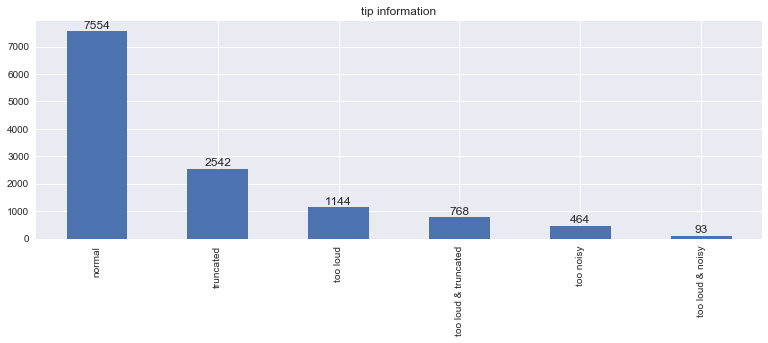

In [583]:
df_status.plot('bar')
for i in range(len(df_status)):
    plt.annotate(df_status[i],xy=[i, df_status[i]+100], horizontalalignment = 'center')
plt.title('tip information')

0: normal
2: too noisy
8: truncated
10: too loud
12: too loud / too noisy
18: too loud / truncated

In [639]:
df_status2 = DataFrame()
df_status2['0'] = [0.001035, 0.026423,0.001830,0.018146,0,0]
df_status2.index = df_status.index
df_status2['not0'] = (df_CS[df_CS.ppScores != 0].AQstatus.value_counts()/len(df_CS)).values
df_status2['all'] = df_status / df_status.sum()

In [640]:
df_status2

,0,not0,all
normal,0.001035,0.600159,0.601194
truncated,0.026423,0.175885,0.202308
too loud,0.001830,0.089216,0.091047
too loud & truncated,0.018146,0.042977,0.061122
too noisy,0.000000,0.036928,0.036928
too loud & noisy,0.000000,0.007402,0.007402


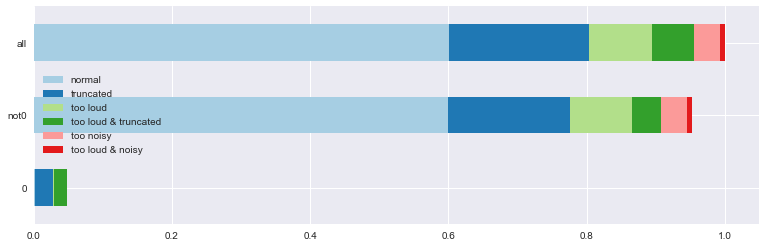

In [644]:
df_status2.T.plot(kind='barh',stacked=True,legend=True,color=sns.color_palette("Paired"))
plt.title('')

In [627]:
(df_CS[df_CS.ppScores == 0].AQstatus.value_counts()/len(df_CS))

8.0     0.026423
18.0    0.018146
10.0    0.001830
0.0     0.001035
Name: AQstatus, dtype: float64

In [609]:
df_CS.AQstatus.value_counts() / len(df_CS)

0.0     0.601194
8.0     0.202308
10.0    0.091047
18.0    0.061122
2.0     0.036928
12.0    0.007402
Name: AQstatus, dtype: float64

In [596]:
df_CS[df_CS.ppScores != 0].AQstatus.value_counts().values

array([7541, 2210, 1121,  540,  464,   93])

In [646]:
df_CS[:2]

,scores,ppScores,AAModel,targetText,markedText,nRef,nHyp,nCorr,nErr,nSub,nDel,nIns,wordScores,wordStatus,AQstatus,AQvol,AQnoisy,AQbgpow,url,corr_ratio,err_ratio,sub_ratio,del_ratio,ins_ratio,word_avgScore
0,2.3,0.437,Child,"""This is my grandma.""","""This is",4.0,4.0,4.0,0.0,0.0,0.0,0.0,"['0.681', '0.109', '1.000', '0.262', '1.000', ...","['ok', 'bad', 'ok', 'soso', 'ok', 'bad', 'bad'...",10.0,0.25,50.0,50.0,http://sas.alo7.com/audios/wav/10519676-cs-400...,1.0,0.0,0.0,0.0,0.0,0.409786
1,2.5,0.495,Child,"""This is my uncle.""","""This",4.0,5.0,4.0,1.0,0.0,0.0,1.0,"['0.081', '0.478', '0.804', '0.073', '0.491', ...","['bad', 'ok', 'ok', 'bad', 'ok', 'ok', 'ok', '...",0.0,0.29,NaN,49.0,http://sas.alo7.com/audios/wav/10519676-cs-400...,0.8,0.2,0.0,0.0,0.2,0.479500


Text(0.5,1,u'finall score distribution on normal & abnormal record')

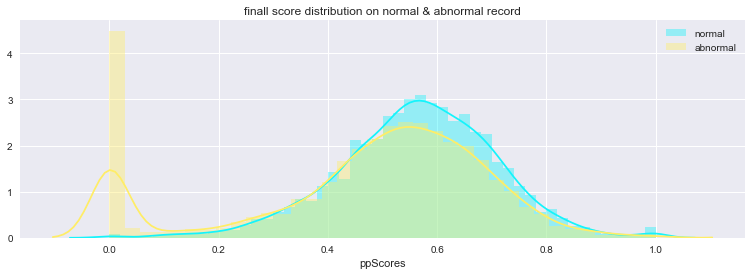

In [655]:
sns.distplot(df_CS[df_CS.AQstatus == 0].ppScores,color="#14F4FC",label='normal')
sns.distplot(df_CS[df_CS.AQstatus != 0].ppScores,color="#FFED66",label='abnormal')
plt.legend()
plt.title('finall score distribution on normal & abnormal record')

In [657]:
df_CS[:2]

,scores,ppScores,AAModel,targetText,markedText,nRef,nHyp,nCorr,nErr,nSub,nDel,nIns,wordScores,wordStatus,AQstatus,AQvol,AQnoisy,AQbgpow,url,corr_ratio,err_ratio,sub_ratio,del_ratio,ins_ratio,word_avgScore
0,2.3,0.437,Child,"""This is my grandma.""","""This is",4.0,4.0,4.0,0.0,0.0,0.0,0.0,"['0.681', '0.109', '1.000', '0.262', '1.000', ...","['ok', 'bad', 'ok', 'soso', 'ok', 'bad', 'bad'...",10.0,0.25,50.0,50.0,http://sas.alo7.com/audios/wav/10519676-cs-400...,1.0,0.0,0.0,0.0,0.0,0.409786
1,2.5,0.495,Child,"""This is my uncle.""","""This",4.0,5.0,4.0,1.0,0.0,0.0,1.0,"['0.081', '0.478', '0.804', '0.073', '0.491', ...","['bad', 'ok', 'ok', 'bad', 'ok', 'ok', 'ok', '...",0.0,0.29,NaN,49.0,http://sas.alo7.com/audios/wav/10519676-cs-400...,0.8,0.2,0.0,0.0,0.2,0.479500


Text(0.5,1,u'word average score')

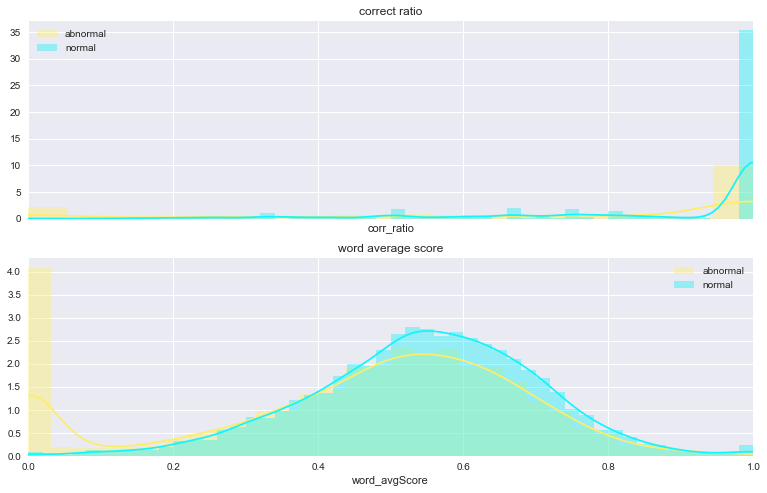

In [666]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 8), sharex=True)
plt.xlim(0,1)


sns.distplot(df_CS[df_CS.AQstatus != 0].corr_ratio, ax=ax1, color="#FFED66", label="abnormal")
sns.distplot(df_CS[df_CS.AQstatus == 0].corr_ratio, ax=ax1, color="#14F4FC", label="normal")
ax1.legend()
ax1.set_title('correct ratio')

sns.distplot(df_CS[df_CS.AQstatus != 0].word_avgScore, ax=ax2, color="#FFED66", label="abnormal")
sns.distplot(df_CS[df_CS.AQstatus == 0].word_avgScore, ax=ax2, color="#14F4FC", label="normal")
ax2.legend()
ax2.set_title('word average score')

In [671]:
len(df_CS)

12565

In [670]:
len(df_singSound)

13497

Text(0.5,1,u'singSound & CS & human')

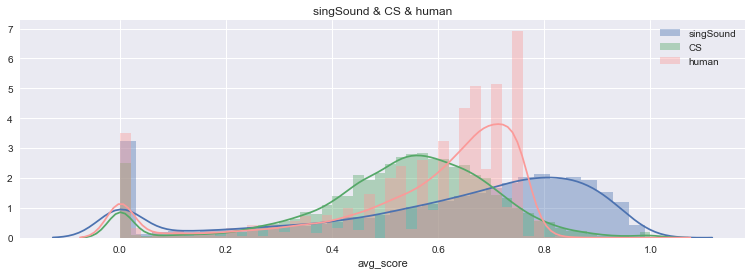

In [871]:
sns.distplot(df_singSound.result_overall/100,label='singSound')
sns.distplot(df_CS.ppScores, label='CS')
sns.distplot(df_singSound.avg_score/4,color=sns.color_palette("Paired")[4],label="human")
plt.legend()
plt.title('singSound & CS & human')

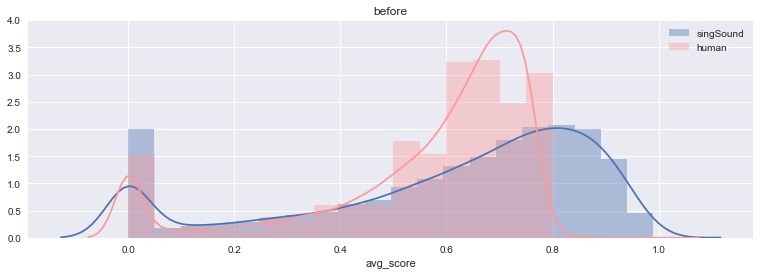

In [752]:
sns.distplot(df_singSound.result_overall/100,label='singSound',bins=20)
sns.distplot(df_singSound.avg_score/4,color=sns.color_palette("Paired")[4],label="human",bins=20)
plt.title('before')
plt.legend()

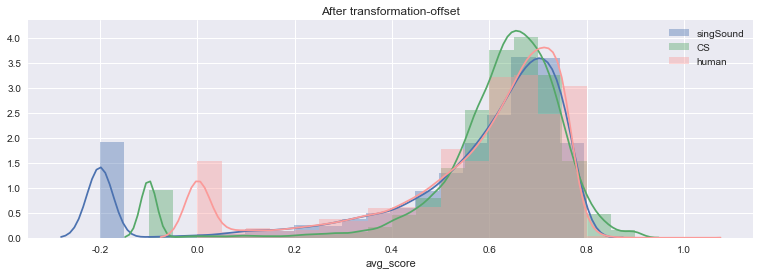

In [879]:
sns.distplot(pow(df_singSound.result_overall/100,0.5)-0.2,label='singSound',bins=10,kde=False)
sns.distplot(pow(df_CS.ppScores,0.5)-0.1, label='CS',color=sns.color_palette()[1],bins=10,kde=False)
sns.distplot(df_singSound.avg_score/4,color=sns.color_palette("Paired")[4],label="human",bins=10,kde=False)

plt.title('After transformation-offset')
plt.legend()

In [843]:
df_method.singSound_values.sum()

13497L

# 无位移

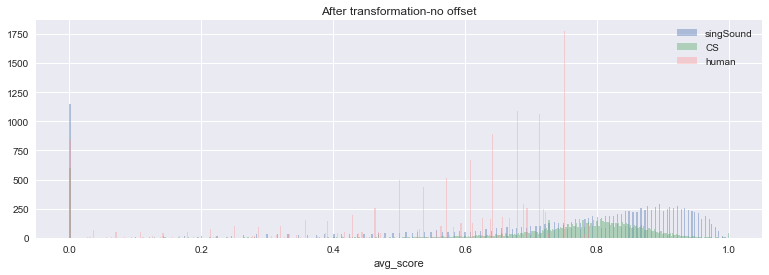

In [934]:
sns.distplot(pow(df_all.result_overall/100,0.5),label='singSound',bins=500,kde=False)
sns.distplot(pow(df_all.ppScores,0.4), label='CS',color=sns.color_palette()[1],bins=500,kde=False)
sns.distplot(df_all.avg_score/4,color=sns.color_palette("Paired")[4],label="human",bins=500,kde=False)
plt.title('After transformation-no offset')
plt.legend()

In [894]:
singSound_T = pd.value_counts(pd.cut(pow(df_all.result_overall/100,0.5),1000)).sort_index()
human = pd.value_counts(pd.cut(df_all.avg_score/4,1000)).sort_index()
CS_T = pd.value_counts(pd.cut(pow(df_CS.ppScores,0.5),1000)).sort_index()

In [901]:
from scipy.spatial.distance import cityblock
from fastdtw import fastdtw
distance_singSound_noOffset, path_singSound_noOffset = fastdtw(singSound_T, human, dist=euclidean)
print('singSound_noOffset: %s' % distance_singSound_noOffset)
distance_CS_noOffset, path_CS_noOffset = fastdtw(CS_T, human, dist=euclidean)
print('CS_noOffset: %s' % distance_CS_noOffset)

singSound_noOffset: 12864.0
CS_noOffset: 19957.0


In [907]:
df_all.to_csv('data/ss_cs_human.csv')

In [923]:
distance_singSound_noOffset_li = []
distance_CS_noOffset_li = []
bin_li = np.arange(1,10001,1)
for bin_va in bin_li:
    singSound_T = pd.value_counts(pd.cut(pow(df_all.result_overall/100,0.5),bin_va)).sort_index()
    human = pd.value_counts(pd.cut(df_all.avg_score/4,bin_va)).sort_index()
    CS_T = pd.value_counts(pd.cut(pow(df_all.ppScores,0.5),bin_va)).sort_index()
    distance_singSound_noOffset_li.append(fastdtw(singSound_T, human, dist=euclidean)[0])
    distance_CS_noOffset_li.append(fastdtw(CS_T, human, dist=euclidean)[0])

KeyboardInterrupt: 

Text(0,0.5,u'distance')

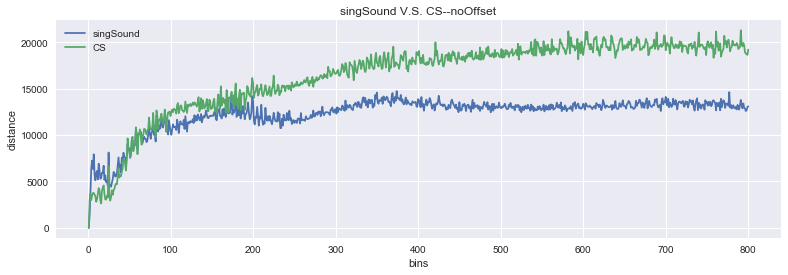

In [925]:
plt.plot(bin_li[:800],distance_singSound_noOffset_li[:800],label='singSound')
plt.plot(bin_li[:800],distance_CS_noOffset_li[:800],label='CS')
plt.legend()
plt.title('singSound V.S. CS--noOffset')
plt.xlabel('bins')
plt.ylabel('distance')

In [924]:
(len(distance_CS_noOffset_li), len(distance_singSound_noOffset_li))

(871, 872)

In [911]:
dis

308

# 有位移

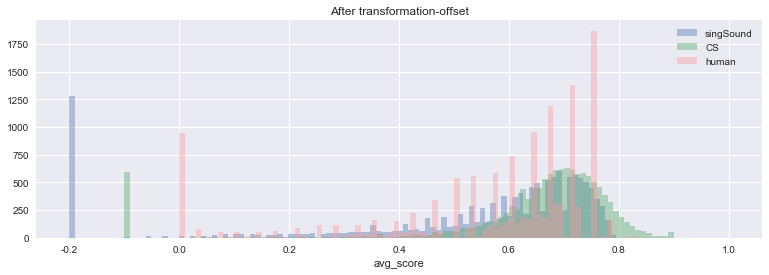

In [938]:
sns.distplot(pow(df_singSound.result_overall/100,0.5)-0.2,label='singSound',bins=100,kde=False)
sns.distplot(pow(df_CS.ppScores,0.4)-0.1, label='CS',color=sns.color_palette()[1],bins=100,kde=False)
sns.distplot(df_singSound.avg_score/4,color=sns.color_palette("Paired")[4],label="human",bins=100,kde=False)
plt.title('After transformation-offset')
plt.legend()

In [896]:
singSound_T = pd.value_counts(pd.cut(pow(df_all.result_overall/100,0.5)-0.2,1000)).sort_index()
human = pd.value_counts(pd.cut(df_all.avg_score/4,1000)).sort_index()
CS_T = pd.value_counts(pd.cut(pow(df_CS.ppScores,0.5)-0.1,1000)).sort_index()

In [897]:
distance_singSound_offset, path_singSound_offset = fastdtw(singSound_T, human, dist=cityblock)
print('singSound_offset: %s' % distance_singSound_offset)
distance_CS_offset, path_CS_offset = fastdtw(CS_T, human, dist=cityblock)
print('CS_offset: %s' % distance_CS_offset)

singSound_offset: 12864.0
CS_offset: 19957.0


In [926]:
distance_singSound_offset_li = []
distance_CS_offset_li = []
bin_li = np.arange(1,10001,1)
for bin_va in bin_li:
    singSound_T = pd.value_counts(pd.cut(pow(df_all.result_overall/100,0.5)-0.2,bin_va)).sort_index()
    human = pd.value_counts(pd.cut(df_all.avg_score/4,bin_va)).sort_index()
    CS_T = pd.value_counts(pd.cut(pow(df_all.ppScores,0.5)-0.1,bin_va)).sort_index()
    distance_singSound_offset_li.append(fastdtw(singSound_T, human, dist=euclidean)[0])
    distance_CS_offset_li.append(fastdtw(CS_T, human, dist=euclidean)[0])

KeyboardInterrupt: 

Text(0.5,1,u'singSound V.S. CS--offset')

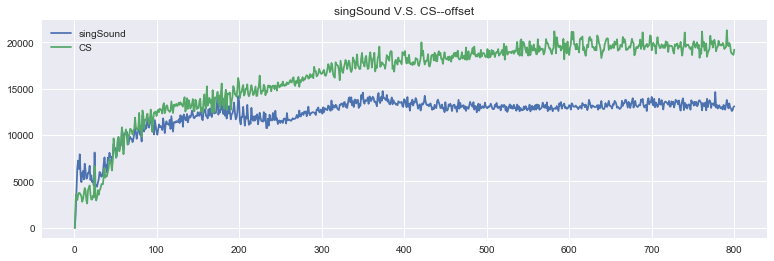

In [927]:
plt.plot(bin_li[:800],distance_singSound_offset_li[:800],label='singSound')
plt.plot(bin_li[:800],distance_CS_offset_li[:800],label='CS')
plt.legend()
plt.title('singSound V.S. CS--offset')

In [928]:
df_compare = DataFrame()
df_compare['singSound_noOffset'] = distance_singSound_noOffset_li[:800]
df_compare['CS_noOffset'] = distance_CS_noOffset_li[:800]
df_compare['singSound_offset'] = distance_singSound_offset_li[:800]
df_compare['CS_offset'] = distance_CS_offset_li[:800]

In [692]:
df_all = pd.merge(df_singSound, df_CS, on='url', how='inner')

Text(0.5,1,u'singSound & CS & human')

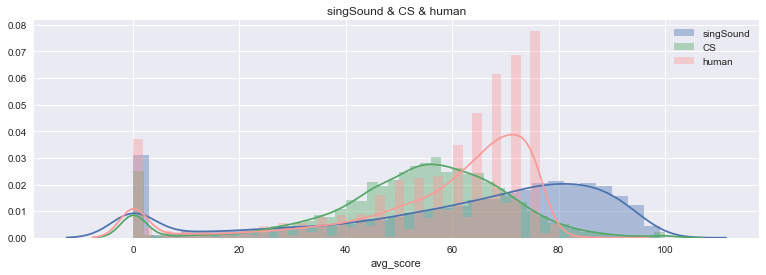

In [694]:
sns.distplot(df_all.result_overall,label='singSound')
sns.distplot(df_all.ppScores*100, label='CS')
sns.distplot(df_all.avg_score * 25,color=sns.color_palette("Paired")[4],label="human")
plt.legend()
plt.title('singSound & CS & human')

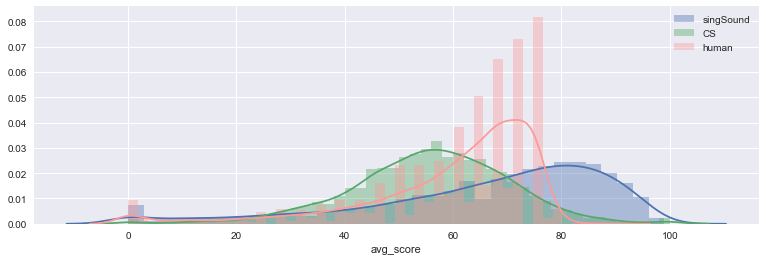

In [700]:
# 按照singSound的提示信息正常的进行筛选对比
sns.distplot(df_all[df_all.result_info_tipId == 0].result_overall,label='singSound')
sns.distplot(df_all[df_all.result_info_tipId == 0].ppScores*100, label='CS')
sns.distplot(df_all[df_all.result_info_tipId == 0].avg_score * 25,color=sns.color_palette("Paired")[4],label="human")
plt.legend()

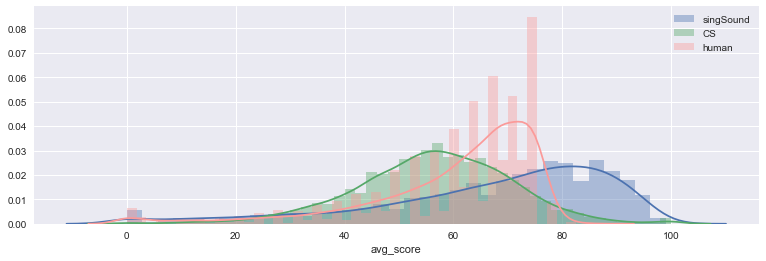

In [701]:
# 按照CS的提示信息正常的进行筛选对比
sns.distplot(df_all[df_all.AQstatus == 0].result_overall,label='singSound')
sns.distplot(df_all[df_all.AQstatus == 0].ppScores*100, label='CS')
sns.distplot(df_all[df_all.AQstatus == 0].avg_score * 25,color=sns.color_palette("Paired")[4],label="human")
plt.legend()

In [ ]:
# 按照CS的提示信息正常的进行筛选对比
sns.distplot(df_all[df_all.AQstatus == 0].result_overall,label='singSound')
sns.distplot(df_all[df_all.AQstatus == 0].ppScores*100, label='CS')
sns.distplot(df_all[df_all.AQstatus == 0].avg_score * 25,color=sns.color_palette("Paired")[4],label="human")
plt.legend()
plt.title('singSound & CS & human')

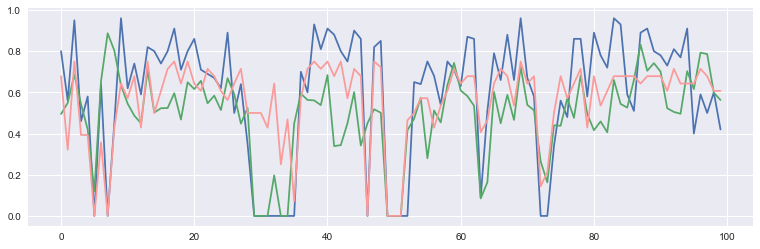

In [945]:
plt.plot(df_all.index[:100], df_all.result_overall[:100]/100, label='singSound')
plt.plot(df_all.index[:100], df_all.ppScores[:100], label='CS')
plt.plot(df_all.index[:100], df_all.avg_score[:100]/4, label='human',color=sns.color_palette("Paired")[4])

In [ ]:
# dtw度量

In [947]:
fastdtw(df_all.result_overall/100, df_all.avg_score/4, dist=cityblock)[0]

2720.5625749999767

In [948]:
fastdtw(df_all.ppScores, df_all.avg_score/4, dist=cityblock)[0]

2032.4799999999968

In [949]:
fastdtw(pow(df_all.result_overall/100,0.5), df_all.avg_score/4, dist=cityblock)[0]

3161.291069031893

In [950]:
fastdtw(pow(df_all.ppScores,0.5), df_all.avg_score/4, dist=cityblock)[0]

2333.770886504707

In [ ]:
# MSE度量

In [953]:
pow((df_all.result_overall.values/100 -  df_all.avg_score.values/4),2).sum()

378.68560006937503

In [954]:
pow((df_all.ppScores.values -  df_all.avg_score.values/4),2).sum()

406.41135586937503

In [955]:
pow((pow(df_all.result_overall.values/100,0.5) -  df_all.avg_score.values/4),2).sum()

656.99672102199133

In [956]:
pow((pow(df_all.ppScores,0.5) -  df_all.avg_score.values/4),2).sum()

575.6336291875862

In [957]:
# scikitlearn mse
from sklearn.metrics import mean_squared_error

In [958]:
mean_squared_error(df_all.result_overall/100, df_all.avg_score/4)

0.030157330578113803

In [959]:
mean_squared_error(df_all.ppScores, df_all.avg_score/4)

0.032365322598500841

In [960]:
mean_squared_error(pow(df_all.result_overall.values/100,0.5), df_all.avg_score/4)

0.05232115322306214

# 尝试不同变换


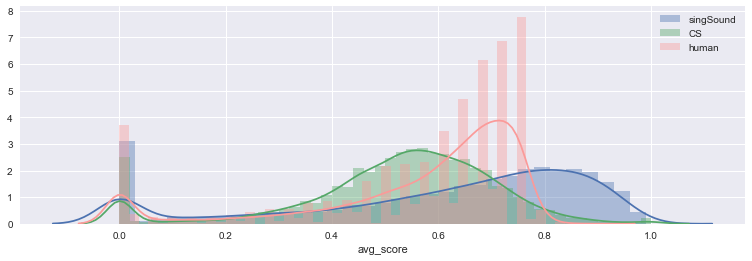

In [963]:
sns.distplot(df_all.result_overall/100,label='singSound')
sns.distplot(df_all.ppScores, label='CS')
sns.distplot(df_all.avg_score/4,color=sns.color_palette("Paired")[4],label="human")
plt.legend()

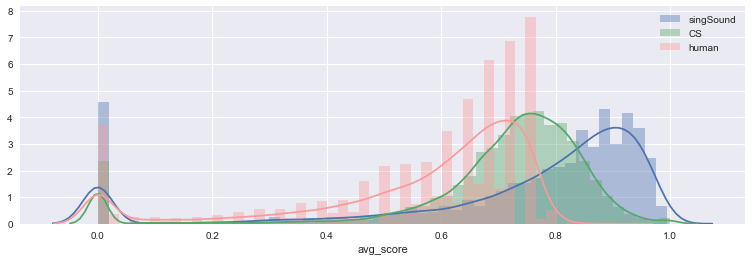

In [965]:
sns.distplot(pow(df_all.result_overall/100,0.5),label='singSound')
sns.distplot(pow(df_all.ppScores,0.5), label='CS')
sns.distplot(df_all.avg_score/4,color=sns.color_palette("Paired")[4],label="human")
plt.legend()

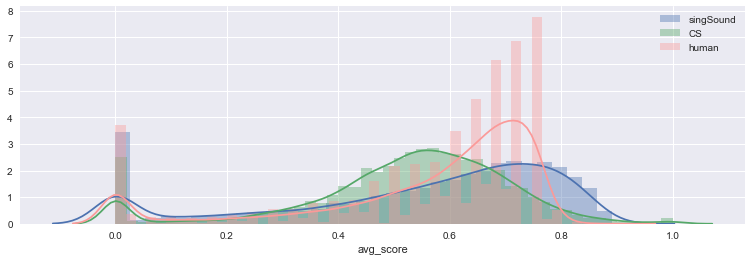

In [975]:
sns.distplot(df_all.result_overall/100*0.,label='singSound')
sns.distplot(df_all.ppScores, label='CS')
sns.distplot(df_all.avg_score/4,color=sns.color_palette("Paired")[4],label="human")
plt.legend()

# 幂变换

In [1078]:
pow_val_li = np.arange(0,2,0.1)
pow_singSound_li = []
pow_CS_li = []
for pow_val in pow_val_li:
    pow_singSound_li.append(mean_squared_error(pow(df_all.result_overall.values/100,pow_val), df_all.avg_score/4))
    pow_CS_li.append(mean_squared_error(pow(df_all.ppScores,pow_val), df_all.avg_score/4))

Text(0,0.5,u'MSE')

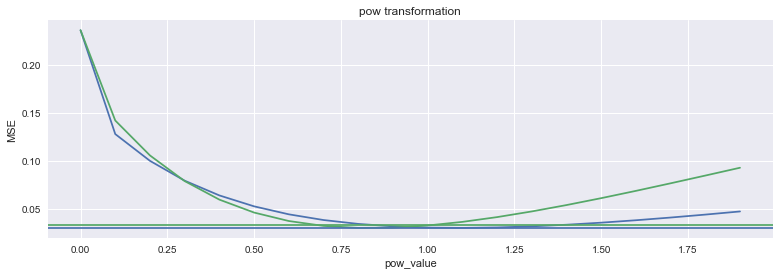

In [1079]:
plt.plot(pow_val_li,pow_singSound_li,label='singSound')
plt.plot(pow_val_li,pow_CS_li,label='CS')
plt.axhline(0.0302,color=sns.color_palette()[0],label='singSound')
plt.axhline(0.0324,color=sns.color_palette()[1],label='CS')
plt.title('pow transformation')
plt.xlabel('pow_value')
plt.ylabel('MSE')

Text(0.8,0.0298392,u'(0.8, 0.02984)')

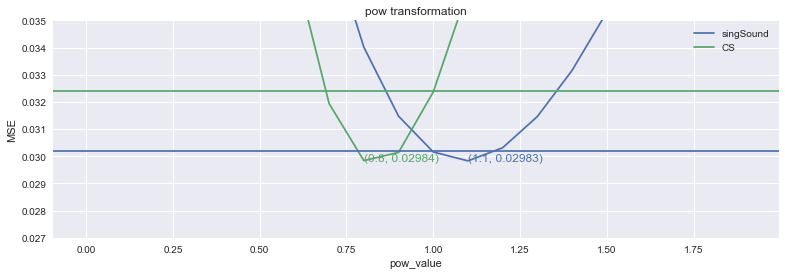

In [1080]:
df_pow = DataFrame()
df_pow['singSound'] = pow_singSound_li
df_pow['CS'] = pow_CS_li
df_pow.index = pow_val_li
plt.plot(pow_val_li,pow_singSound_li,label='singSound')
plt.plot(pow_val_li,pow_CS_li,label='CS')
plt.axhline(0.0302,color=sns.color_palette()[0],label='singSound')
plt.axhline(0.0324,color=sns.color_palette()[1],label='CS')
plt.title('pow transformation')
plt.xlabel('pow_value')
plt.ylabel('MSE')
plt.ylim(0.027,0.035)
plt.legend()
plt.annotate((round(df_pow[df_pow.singSound == df_pow.singSound.min()].index[0],3),
              round(df_pow.singSound.min(),5)
             ),
             [df_pow[df_pow.singSound == df_pow.singSound.min()].index[0], df_pow.singSound.min()],
             color=sns.color_palette()[0])
plt.annotate((round(df_pow[df_pow.CS == df_pow.CS.min()].index[0],3),
              round(df_pow.CS.min(),5)
             ),
             [df_pow[df_pow.CS == df_pow.CS.min()].index[0], df_pow.CS.min()],
             color=sns.color_palette()[1])

Text(0.5,1,u'raw')

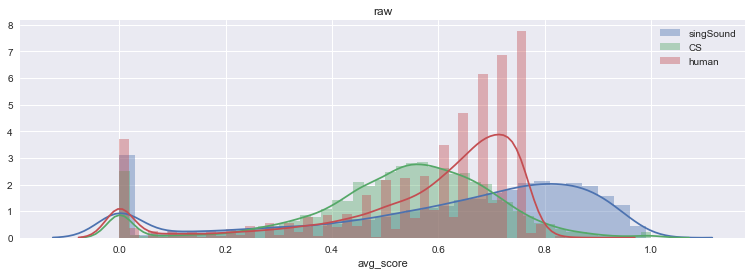

In [1190]:
sns.distplot(df_all.result_overall/100,label='singSound')
sns.distplot(df_all.ppScores,label='CS')
sns.distplot(df_all.avg_score/4,label='human')
plt.legend()
plt.title('raw')

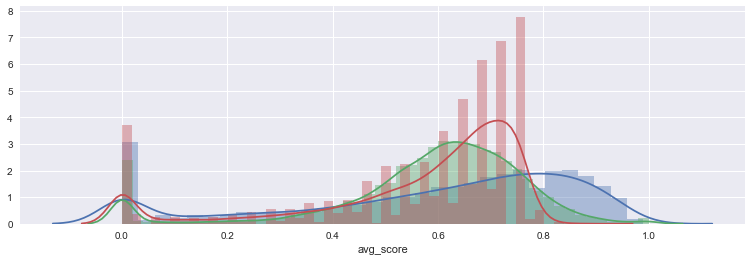

In [1188]:
sns.distplot(pow(df_all.result_overall/100,1.1),label='singSound')
sns.distplot(pow(df_all.ppScores,0.8),label='CS')
sns.distplot(df_all.avg_score/4,label='Human')
plt.legend()
plt.title('power transformation')

对分布的没有太大改变

# 乘除变换

In [1106]:
div_val_li = np.arange(0,2,0.1)
div_singSound_li = []
div_CS_li = []
for div_val in div_val_li:
    div_singSound_li.append(mean_squared_error(df_all.result_overall.values/100 * div_val, df_all.avg_score/4))
    div_CS_li.append(mean_squared_error(df_all.ppScores*div_val, df_all.avg_score/4))

Text(0,0.5,u'MSE')

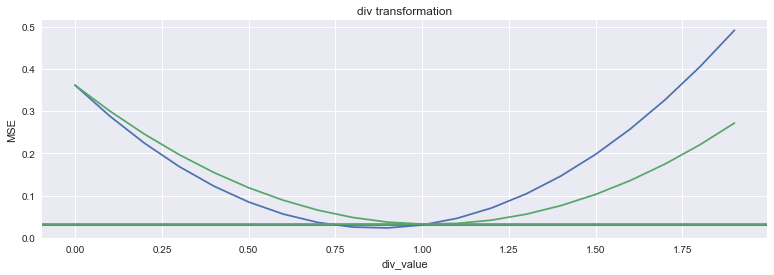

In [1107]:
plt.plot(div_val_li,div_singSound_li,label='singSound')
plt.plot(div_val_li,div_CS_li,label='CS')
plt.axhline(0.0302,color=sns.color_palette()[0],label='singSound')
plt.axhline(0.0324,color=sns.color_palette()[1],label='CS')
plt.title('div transformation')
plt.xlabel('div_value')
plt.ylabel('MSE')

Text(1,0.0323653,u'(1.0, 0.03237)')

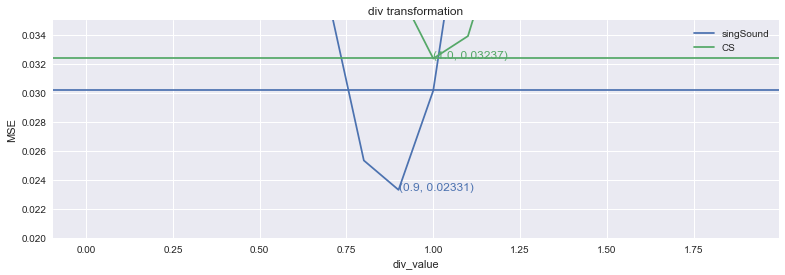

In [1111]:
df_div = DataFrame()
df_div['singSound'] = div_singSound_li
df_div['CS'] = div_CS_li
df_div.index = div_val_li
plt.plot(div_val_li,div_singSound_li,label='singSound')
plt.plot(div_val_li,div_CS_li,label='CS')
plt.axhline(0.0302,color=sns.color_palette()[0],label='singSound')
plt.axhline(0.0324,color=sns.color_palette()[1],label='CS')
plt.title('div transformation')
plt.xlabel('div_value')
plt.ylabel('MSE')
plt.ylim(0.02,0.035)
plt.legend()
plt.annotate((round(df_div[df_div.singSound == df_div.singSound.min()].index[0],3),
              round(df_div.singSound.min(),5)
             ),
             [df_div[df_div.singSound == df_div.singSound.min()].index[0], df_div.singSound.min()],
             color=sns.color_palette()[0])
plt.annotate((round(df_div[df_div.CS == df_div.CS.min()].index[0],3),
              round(df_div.CS.min(),5)
             ),
             [df_div[df_div.CS == df_div.CS.min()].index[0], df_div.CS.min()],
             color=sns.color_palette()[1])

Text(0.5,1,u'raw')

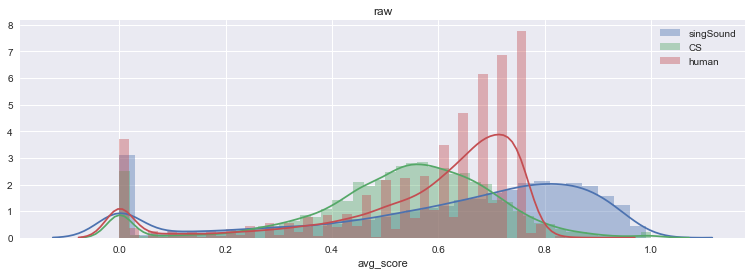

In [1198]:
sns.distplot(df_all.result_overall/100,label='singSound')
sns.distplot(df_all.ppScores,label='CS')
sns.distplot(df_all.avg_score/4,label='human')
plt.legend()
plt.title('raw')

Text(0.5,1,u'div transformation')

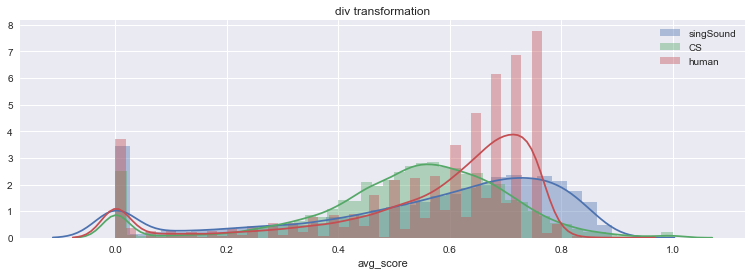

In [1197]:
sns.distplot(df_all.result_overall/100*0.9,label='singSound')
sns.distplot(df_all.ppScores,label='CS')
sns.distplot(df_all.avg_score/4,label='human')
plt.legend()
plt.title('div transformation')

# 指数变换

In [1090]:
exp_val_li = list(np.arange(0,2,0.1))
exp_singSound_li = []
exp_CS_li = []
for exp_val in exp_val_li:
    exp_singSound_li.append(mean_squared_error(exp_val**(df_all.result_overall.values/100), df_all.avg_score/4))
    exp_CS_li.append(mean_squared_error(exp_val**(df_all.ppScores), df_all.avg_score/4))

In [1067]:
mean_squared_error(2**(df_all.result_overall.values/100),df_all.avg_score/4 )

1.0002056835231505

Text(0,0.5,u'MSE')

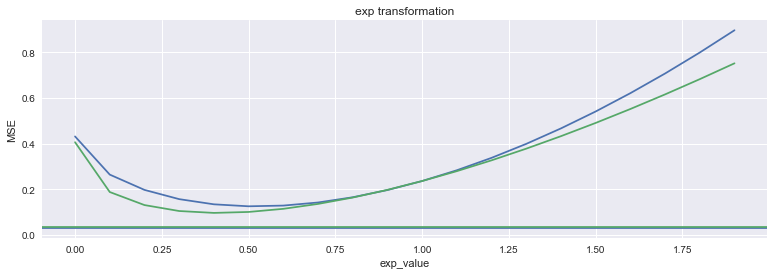

In [1091]:
plt.plot(exp_val_li,exp_singSound_li,label='singSound')
plt.plot(exp_val_li,exp_CS_li,label='CS')
plt.axhline(0.0302,color=sns.color_palette()[0],label='singSound')
plt.axhline(0.0324,color=sns.color_palette()[1],label='CS')
plt.title('exp transformation')
plt.xlabel('exp_value')
plt.ylabel('MSE')

Text(0.4,0.0960219,u'(0.4, 0.09602)')

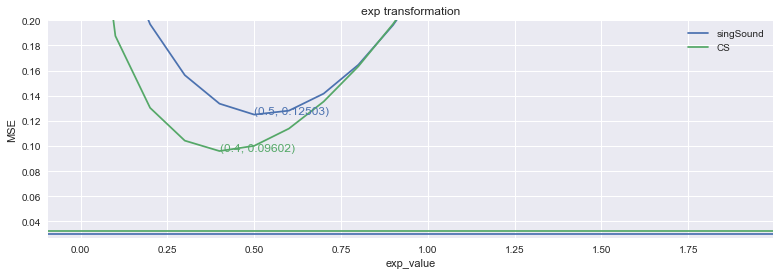

In [1092]:
df_exp = DataFrame()
df_exp['singSound'] = exp_singSound_li
df_exp['CS'] = exp_CS_li
df_exp.index = exp_val_li
plt.plot(exp_val_li,exp_singSound_li,label='singSound')
plt.plot(exp_val_li,exp_CS_li,label='CS')
plt.axhline(0.0302,color=sns.color_palette()[0],label='singSound')
plt.axhline(0.0324,color=sns.color_palette()[1],label='CS')
plt.title('exp transformation')
plt.xlabel('exp_value')
plt.ylabel('MSE')
plt.ylim(0.027,0.2)
plt.legend()
plt.annotate((round(df_exp[df_exp.singSound == df_exp.singSound.min()].index[0],3),
              round(df_exp.singSound.min(),5)
             ),
             [df_exp[df_exp.singSound == df_exp.singSound.min()].index[0], df_exp.singSound.min()],
             color=sns.color_palette()[0])
plt.annotate((round(df_exp[df_exp.CS == df_exp.CS.min()].index[0],3),
              round(df_exp.CS.min(),5)
             ),
             [df_exp[df_exp.CS == df_exp.CS.min()].index[0], df_exp.CS.min()],
             color=sns.color_palette()[1])

# 对数变换

In [1117]:
from math import  log

In [1150]:
log_val_li = np.arange(0,2,0.1)[1:]
[log(df_all.result_overall.values/100,log_val) for i in range(1,len(df_all))]

ValueError: math domain error

In [1149]:
log(df_all.result_overall.values[1]/100,)

0.2518119729937996

In [1152]:
log_val_li

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9])

In [1162]:
log_val_li = list(np.arange(-2,2,0.1))
log_singSound_li = []
log_CS_li = []
test = [log(df_all[df_all.result_overall != 0].result_overall.values[i]/100,log_val) for i in range(len(df_all[df_all.result_overall != 0]))]
test2 = [log(df_all[df_all.ppScores != 0].ppScores.values[i]/100,log_val) for i in range(len(df_all[df_all.ppScores != 0]))]
for log_val in log_val_li:
    log_singSound_li.append(mean_squared_error(test, df_all[df_all.result_overall != 0].avg_score/4))
    log_CS_li.append(mean_squared_error(test2, df_all[df_all.ppScores != 0].avg_score/4))

Text(0,0.5,u'MSE')

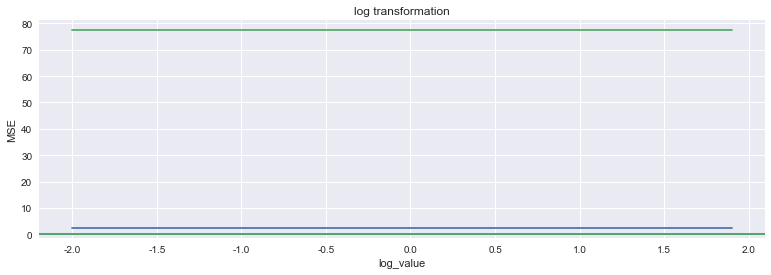

In [1163]:
plt.plot(log_val_li,log_singSound_li,label='singSound')
plt.plot(log_val_li,log_CS_li,label='CS')
plt.axhline(0.0302,color=sns.color_palette()[0],label='singSound')
plt.axhline(0.0324,color=sns.color_palette()[1],label='CS')
plt.title('log transformation')
plt.xlabel('log_value')
plt.ylabel('MSE')

Text(0.4,0.0960219,u'(0.4, 0.09602)')

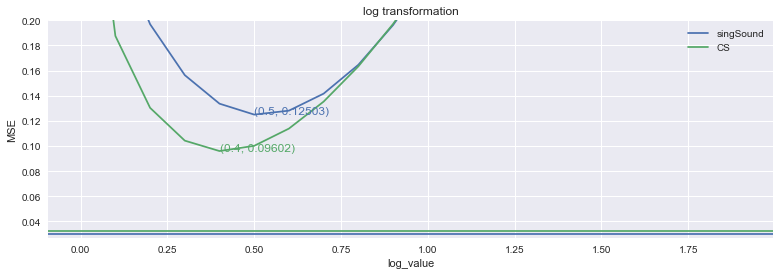

In [1114]:
df_log = DataFrame()
df_log['singSound'] = log_singSound_li
df_log['CS'] = log_CS_li
df_log.index = log_val_li
plt.plot(log_val_li,log_singSound_li,label='singSound')
plt.plot(log_val_li,log_CS_li,label='CS')
plt.axhline(0.0302,color=sns.color_palette()[0],label='singSound')
plt.axhline(0.0324,color=sns.color_palette()[1],label='CS')
plt.title('log transformation')
plt.xlabel('log_value')
plt.ylabel('MSE')
plt.ylim(0.027,0.2)
plt.legend()
plt.annotate((round(df_log[df_log.singSound == df_log.singSound.min()].index[0],3),
              round(df_log.singSound.min(),5)
             ),
             [df_log[df_log.singSound == df_log.singSound.min()].index[0], df_log.singSound.min()],
             color=sns.color_palette()[0])
plt.annotate((round(df_log[df_log.CS == df_log.CS.min()].index[0],3),
              round(df_log.CS.min(),5)
             ),
             [df_log[df_log.CS == df_log.CS.min()].index[0], df_log.CS.min()],
             color=sns.color_palette()[1])

# 三角变换

In [1174]:
from math import tan

In [1181]:
tan_val_li = list(np.arange(-1,1,0.1))
tan_singSound_li = []
tan_CS_li = []
test = [tan(df_all.result_overall.values[i]) for i in range(len(df_all))]
test2 = [tan(df_all.ppScores.values[i]) for i in range(len(df_all))]
for tan_val in tan_val_li:
    tan_singSound_li.append(mean_squared_error(test, df_all.avg_score/4))
    tan_CS_li.append(mean_squared_error(test2, df_all.avg_score/4))

In [1182]:
len(tan_singSound_li), len(tan_val_li)
len(tan_CS_li), len(tan_val_li)

(20, 20)

In [1183]:
mean_squared_error(test, df_all.avg_score/4)

198.09669031338825

Text(0,0.5,u'MSE')

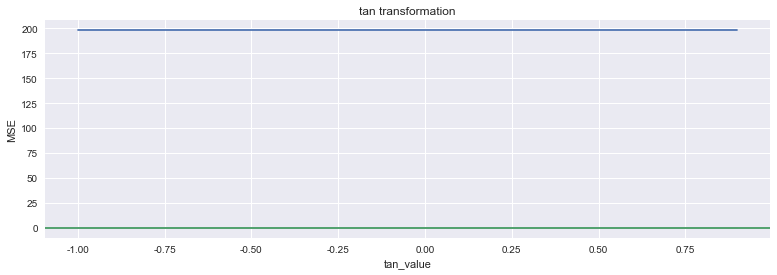

In [1184]:
plt.plot(tan_val_li,tan_singSound_li,label='singSound')
plt.plot(tan_val_li,tan_CS_li,label='CS')
plt.axhline(0.0302,color=sns.color_palette()[0],label='singSound')
plt.axhline(0.0324,color=sns.color_palette()[1],label='CS')
plt.title('tan transformation')
plt.xlabel('tan_value')
plt.ylabel('MSE')

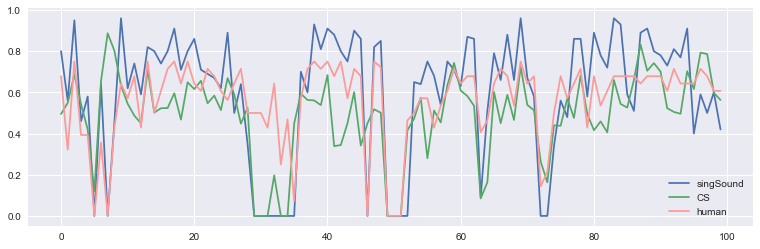

In [115]:
plt.plot(df_all.index[:100], df_all.result_overall[:100]/100, label='singSound')
plt.plot(df_all.index[:100], df_all.ppScores[:100], label='CS')
plt.plot(df_all.index[:100], df_all.avg_score[:100]/4, label='human',color=sns.color_palette("Paired")[4])
plt.legend()

In [2]:
df_all = pd.read_csv('data/ss_cs_human.csv').drop(['Unnamed: 0'],axis=1)

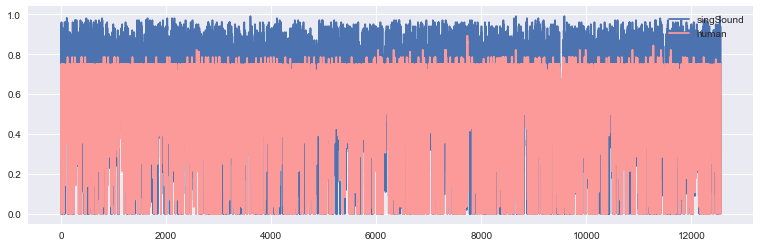

In [1202]:
# 比较singSound
plt.plot(df_all.result_overall/100,label='singSound')
plt.plot(df_all.avg_score/4,label='human', color=sns.color_palette("Paired")[4])
plt.legend()

In [3]:
singSound_huamn_dis = df_all.result_overall/100 - df_all.avg_score/4

<Container object of 12557 artists>

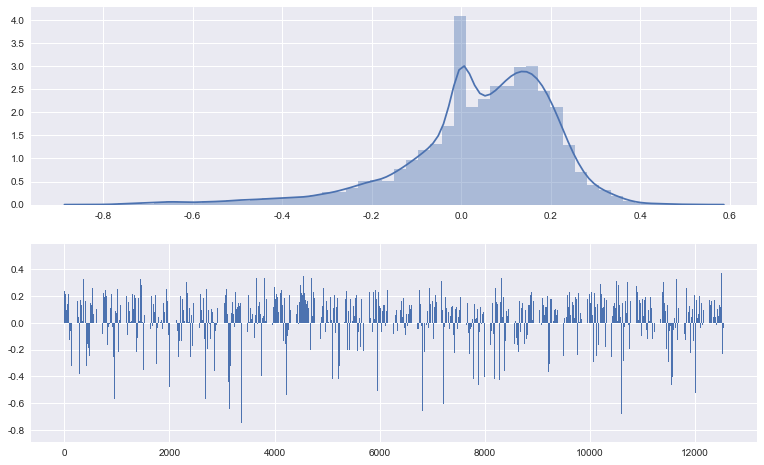

In [5]:
import seaborn as sns
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 8), sharex=False)
sns.distplot(singSound_huamn_dis,ax=ax1)
ax2.bar(np.arange(len(singSound_huamn_dis)), singSound_huamn_dis)

In [6]:
df_singSound_dis = DataFrame(singSound_huamn_dis)
df_singSound_dis.columns = ['dis']

In [7]:
(singSound_huamn_dis.min(), singSound_huamn_dis.max())

(-0.82142499999999996, 0.52142499999999992)

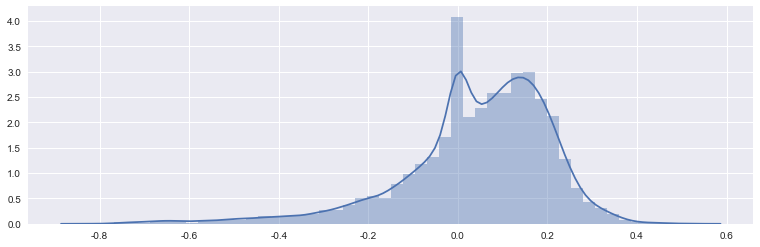

In [33]:
plt.rc('figure', figsize=(13, 4))
sns.distplot(singSound_huamn_dis,bins=50)

In [16]:
import pymc3 as pm
from pymc3 import Normal

In [ ]:
#利用pymc3

In [19]:
basic_model = pm.Model()

with basic_model:
    mu = pm.Normal('mean',0.1,sd=1)
    std = pm.Normal('std',0.1,sd=1)
    
    Y_obs = pm.Normal('Y_obs',mu=mu,sd=std,observed=singSound_huamn_dis)

In [20]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate

logp = -inf, ||grad|| = 0.24366: 100%|██████████| 14/14 [00:00<00:00, 808.42it/s]  


{'mean': array(0.06920316573131434), 'std': array(-0.11454781109789727)}

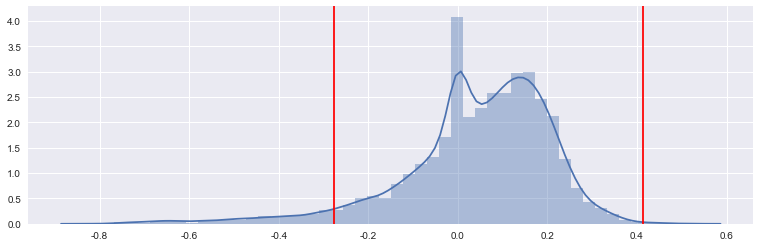

In [24]:
plt.rc('figure', figsize=(13, 4))
sns.distplot(singSound_huamn_dis,bins=50)
plt.axvline(0.0692-0.345,color='red')
plt.axvline(0.0692+0.345,color='red')

正态分布3σ原则：      
数值分布在（μ—σ,μ+σ)中的概率为0.6526     
数值分布在（μ—2σ,μ+2σ)中的概率为0.9544    
数值分布在（μ—3σ,μ+3σ)中的概率为0.9974      

In [38]:
singSound_1sigma_pymc = len(df_singSound_dis[(df_singSound_dis.dis < 0.0692+0.345) 
                                        & (df_singSound_dis.dis > 0.0692-0.345)]) / len(singSound_huamn_dis)
singSound_2sigma_pymc = len(df_singSound_dis[(df_singSound_dis.dis < 0.0692+0.23) 
                                        & (df_singSound_dis.dis > 0.0692-0.23)]) / len(singSound_huamn_dis)
singSound_3sigma_pymc = len(df_singSound_dis[(df_singSound_dis.dis < 0.0692+0.115) 
                                        & (df_singSound_dis.dis > 0.0692-0.115)]) / len(singSound_huamn_dis)

In [39]:
(singSound_1sigma_pymc, singSound_2sigma_pymc, singSound_3sigma_pymc)

(0.9487935016325555, 0.8788723421199331, 0.6085052162140638)

In [25]:
# scipy
from scipy.stats import norm
mu, std = norm.fit(singSound_huamn_dis)

In [27]:
(mu, std)

(0.042383118977462775, 0.16840724985539085)

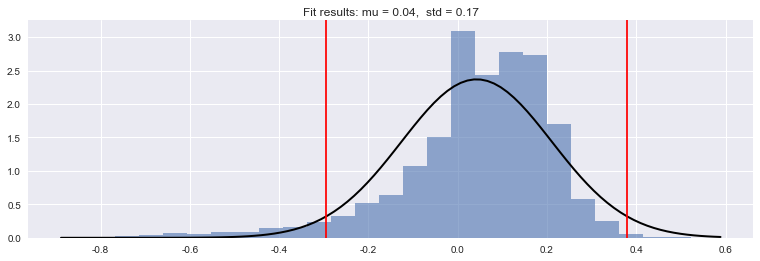

In [31]:
plt.hist(singSound_huamn_dis, bins=25, normed=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.axvline(mu-2*std,color='red',label='singSound')
plt.axvline(mu+2*std,color='red',label='CS')
plt.show()

In [41]:
singSound_1sigma_scipy = len(df_singSound_dis[(df_singSound_dis.dis < mu+std) 
                                        & (df_singSound_dis.dis > mu-std)]) / len(singSound_huamn_dis)
singSound_2sigma_scipy = len(df_singSound_dis[(df_singSound_dis.dis < mu+2*std) 
                                        & (df_singSound_dis.dis > mu-2*std)]) / len(singSound_huamn_dis)
singSound_3sigma_scipy = len(df_singSound_dis[(df_singSound_dis.dis < mu+3*std) 
                                        & (df_singSound_dis.dis > mu-3*std)]) / len(singSound_huamn_dis)

In [42]:
(singSound_3sigma_scipy, singSound_2sigma_scipy, singSound_1sigma_scipy)

(0.9816835231345067, 0.9522178864378434, 0.7608505216214064)

In [43]:
# 比较CS
CS_huamn_dis = df_all.ppScores - df_all.avg_score/4

<Container object of 12557 artists>

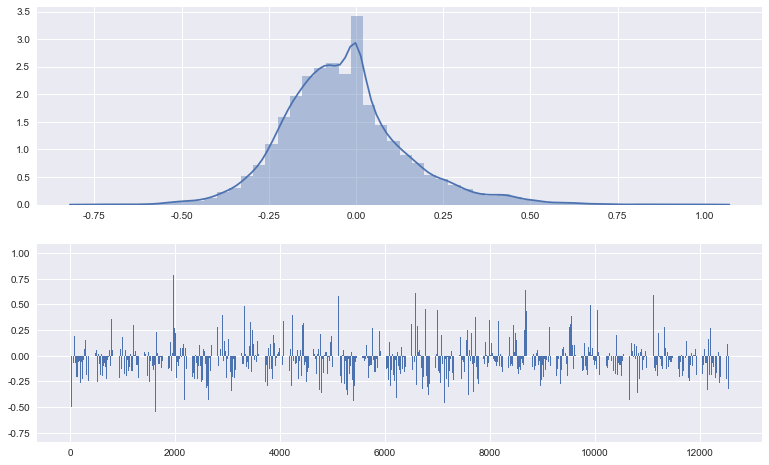

In [44]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 8), sharex=False)
sns.distplot(CS_huamn_dis,ax=ax1)
ax2.bar(np.arange(len(CS_huamn_dis)), CS_huamn_dis)

In [45]:
df_CS_dis = DataFrame(CS_huamn_dis)
df_CS_dis.columns = ['dis']

In [49]:
# pymc3
basic_model = pm.Model()

with basic_model:
    mu = pm.Normal('mean',0.1,sd=1)
    std = pm.Normal('std',0.1,sd=1)
    
    Y_obs = pm.Normal('Y_obs',mu=mu,sd=std,observed=CS_huamn_dis)
    
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

logp = -inf, ||grad|| = 0.79129: 100%|██████████| 13/13 [00:00<00:00, 707.79it/s]   


{'mean': array(0.11715895852044254), 'std': array(-0.5558808562460078)}

In [50]:
# scipy
mu, std = norm.fit(CS_huamn_dis)
(mu, std)

(-0.036185408537070959, 0.17622695255694035)

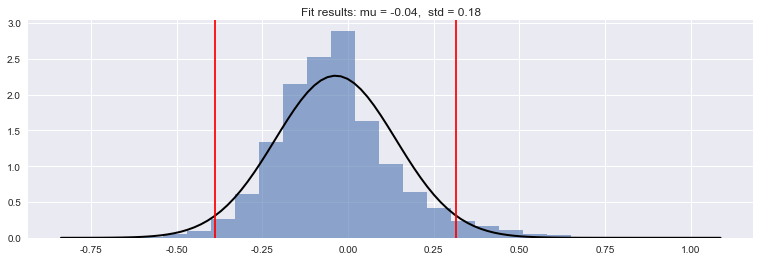

In [54]:
plt.hist(CS_huamn_dis, bins=25, normed=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.axvline(mu-2*std,color='red')
plt.axvline(mu+2*std,color='red')
plt.show()

In [52]:
CS_1sigma_scipy = len(df_CS_dis[(df_CS_dis.dis < mu+std) 
                                        & (df_CS_dis.dis > mu-std)]) / len(CS_huamn_dis)
CS_2sigma_scipy = len(df_CS_dis[(df_CS_dis.dis < mu+2*std) 
                                        & (df_CS_dis.dis > mu-2*std)]) / len(CS_huamn_dis)
CS_3sigma_scipy = len(df_CS_dis[(df_CS_dis.dis < mu+3*std) 
                                        & (df_CS_dis.dis > mu-3*std)]) / len(CS_huamn_dis)

In [53]:
(CS_3sigma_scipy, CS_2sigma_scipy, CS_1sigma_scipy)

(0.9893286613044517, 0.9465636696663215, 0.733773990602851)

In [55]:
(singSound_3sigma_scipy, singSound_2sigma_scipy, singSound_1sigma_scipy)

(0.9816835231345067, 0.9522178864378434, 0.7608505216214064)

In [56]:
df_dis = DataFrame()
df_dis['singSound_dis'] = df_singSound_dis.dis.values
df_dis['CS_dis'] = df_CS_dis.dis.values

<Container object of 12557 artists>

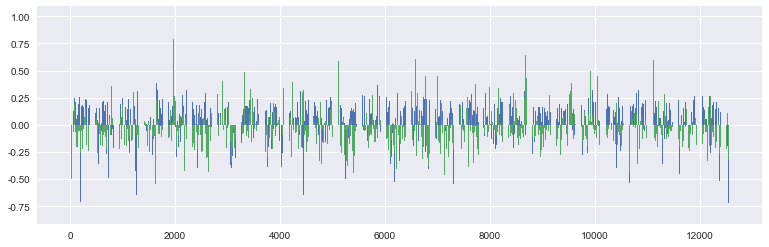

In [58]:
plt.bar(np.arange(len(singSound_huamn_dis)), singSound_huamn_dis)
plt.bar(np.arange(len(CS_huamn_dis)), CS_huamn_dis)

In [ ]:
singSound_huamn_dis

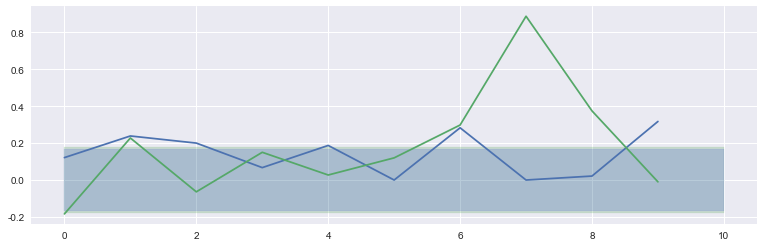

In [108]:
plt.plot(singSound_huamn_dis[:10])
plt.fill_between(np.linspace(0,10,10),0 + 0.17,0 - 0.17,alpha=0.15, color='blue')
plt.plot(CS_huamn_dis[:10])
plt.fill_between(np.linspace(0,10,10),0 + 0.18,0 - 0.18,alpha=0.15, color='green')

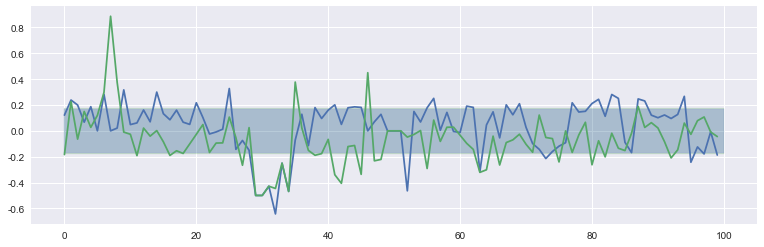

In [107]:
plt.plot(singSound_huamn_dis[:100])
plt.fill_between(np.linspace(0,100,100),0 + 0.17,0 - 0.17,alpha=0.15, color='blue')
plt.plot(CS_huamn_dis[:100])
plt.fill_between(np.linspace(0,100,100),0 + 0.18,0 - 0.18,alpha=0.15, color='green')

In [ ]:
plt.plot(singSound_huamn_dis[:100])

In [60]:
# 打标签
# 1->singSound better
# 0->CS better
label_li = []
for i in range(len(df_dis)):
    if abs(df_dis.singSound_dis[i]) < abs(df_dis.CS_dis[i]):
        label_li.append(1)
    else:
        label_li.append(0)

In [61]:
df_dis['label'] = label_li

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

In [68]:
X = df_dis.ix[:,:2].values
y = df_dis.label.values

In [69]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [70]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)

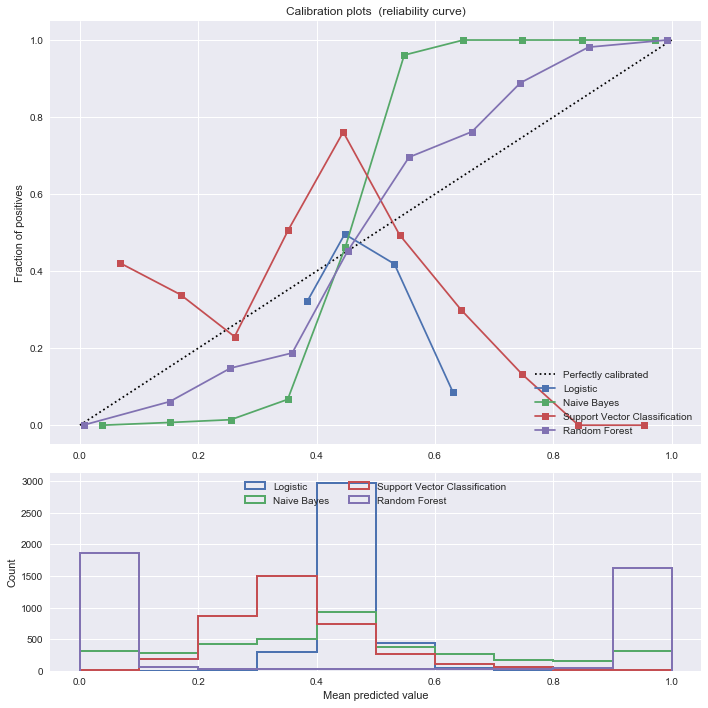

In [73]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [82]:
from sklearn.metrics import confusion_matrix
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[1706  299]
 [1574  189]]


In [84]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[1990   15]
 [ 470 1293]]


In [85]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[1705  300]
 [1574  189]]


In [86]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[1989   16]
 [  25 1738]]


#  transformed

singSound 乘除变换     
CS 幂变换

In [110]:
div_ss_dis=df_all.result_overall.values/100 * 0.9 - df_all.avg_score/4

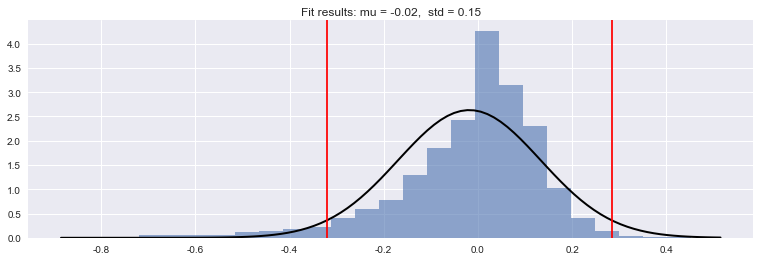

In [111]:
mu, std = norm.fit(div_ss_dis)
(mu, std)
plt.hist(div_ss_dis, bins=25, normed=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.axvline(mu-2*std,color='red')
plt.axvline(mu+2*std,color='red')
plt.show()

In [113]:
df_div_ss_dis = DataFrame(div_ss_dis)
df_div_ss_dis.columns = ['dis']

In [114]:
div_ss_1sigma_scipy = len(df_div_ss_dis[(df_div_ss_dis.dis < mu+std) 
                                        & (df_div_ss_dis.dis > mu-std)]) / len(df_div_ss_dis)
CS_2sigma_scipy = len(df_div_ss_dis[(df_div_ss_dis.dis < mu+2*std) 
                                        & (df_div_ss_dis.dis > mu-2*std)]) / len(df_div_ss_dis)
CS_3sigma_scipy = len(df_div_ss_dis[(df_div_ss_dis.dis < mu+3*std) 
                                        & (df_div_ss_dis.dis > mu-3*std)]) / len(df_div_ss_dis)